# Heart Disease Prediction

#### Osama Alfawzan

# Table of Contents

   * [1. Introduction](#1.-Introduction)
     * [1.1 Dataset Source](#1.1-Dataset-Source)
     * [1.2 Dataset Details](#1.2-Dataset-Details)
     * [1.3 Dataset Features](#1.3-Dataset-Features)
     * [1.4 Target Feature](#1.4-Target-Feature)
   * [2. Goals and Objectives](#2.-Goals-and-Objectives)
   * [3. Data Cleaning and Preprocessing](#3.-Data-Cleaning-and-Preprocessing)
     * [3.1 Summary Statistics](#3.1-Summary-Statistics)
     * [3.2 Dropping irrelevant features from our dataset](#3.2-Dropping-irrelevant-features-from-our-dataset)
     * [3.3 Checking the data types](#3.3-Checking-the-data-types)
     * [3.4 Removing outliers](#3.4-Removing-outliers)
     * [3.5 Dealing with missing values](#3.5-Dealing-with-missing-values)
   * [4. Data Exploration and Visualisation](#4.-Data-Exploration-and-Visualisation)
     * [4.1 Univariate Visualisation](#4.1-Univariate-Visualisation)
     * [4.2 Two-Variable Visualisation](#4.2-Two-Variable-Visualisation)
     * [4.3 Three-Variable Visualisation](#4.3-Three-Variable-Visualisation)
   * [5. Literature Review](#5.-Literature-Review)
   * [6. Summary and Conclusions](#6.-Summary-and-Conclusions)
   * [7. References](#7.-References)

## 1. Introduction

The "Statlog (Heart)" dataset contains information on people who have been diagnosed with heart disease. This dataset was taken from the UCI Machine Learning Repository, which is a public resource of machine learning datasets.

We will perform a variety of data cleaning and preprocessing operations on the dataset in this project, including summary statistics, removing irrelevant features, checking the data types, removing outliers, and handling missing values. We will also use visualisations to investigate the dataset in order to gain insights and understand the relationships between the variables.

### 1.1 Dataset Source

The "Statlog (Heart)" dataset was obtained from the UCI Machine Learning Repository, which is a public resource for machine learning datasets. You can download the dataset from [here](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29).

### 1.2 Dataset Details

The dataset contains 270 records and 13 attributes that include the patient's age, sex, chest pain type, resting blood pressure, cholesterol measurement, fasting blood sugar, resting electrocardiographic measurement, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, The slope of the peak exercise ST segment, The number of major vessels colored by flourosopy, and thalassemia. The target feature is the presence or absence of heart disease, with 1 indicating the presence of heart disease and 0 indicating the absence of heart disease.

In the next cell, we will print 10 randomly selected instances. Therefore, we need to load the required packages and the dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore") #To ensure that no important warnings are being ignored.


# Required Packages:
import numpy as np
import pandas as pd
import io
import requests
from IPython.display import display, HTML
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")


# Load the data: 
df = pd.read_csv('heart_disease.csv')

# Shwoing the 10 obs randomly from the datasets
display(HTML('<b>Table 1. Randomly Selected Observations</b>'))
df.sample(n=10)

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced\t,Oldpeak,Slope\t,MajorVessels,Thal,Class
38,42,1,3,130,180,0,0,150,0,0.0,1,0,3,1
63,60,0,1,150,240,0,0,171,0,0.9,1,0,3,1
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3,1
98,64,0,3,140,313,0,0,133,0,0.2,1,0,7,1
73,76,0,3,140,197,0,1,116,0,1.1,2,0,3,1
10,59,1,4,135,234,0,0,161,0,0.5,2,0,7,1
121,54,1,4,122,286,0,2,116,1,3.2,2,2,3,2
193,35,1,4,126,282,0,2,156,1,0.0,1,0,7,2
42,44,1,3,130,233,0,0,179,1,0.4,1,0,3,1
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,1


### 1.3 Dataset Features

Table 2. below provides specific information about each feature, such as its name, data type, unit, and description. Feature describtions were taken from a similar dataset on Kaggle and can be found [here](https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model).

In [2]:
from tabulate import tabulate
table = [['Name','Data Type','Units','Description'],
         ['Age','Numerical','Years','Age of the patient'],
         ['Sex','Nominal Categorical','Binary','The patient\'s sex:\n1: Male\n0: Female'],
         ['ChestPainType','Nominal Categorical','NA','Chest pain type:\n1: Typical angina\n2: Atypical angina\n3: Non-anginal pain\n4: Asymptomatic'],
         ['RestBloodPressure','Numerical','mmHg','Resting blood pressure'],
         ['SerumCholestoral','Numerical','mg/dl','The patient\'s cholesterol measurement'],
         ['FastingBloodSugar','Nominal Categorical','Binary','Fasting blood sugar > 120 mg/dl:\n1: True\n0: False'],
         ['ResElectrocardiographic','Nominal Categorical','NA','Resting electrocardiographic measurement:\n0: Normal\n1: Having ST-T wave abnormality\n2: Showing probable or definite left ventricular hypertrophy\nby Estes\' criteria'],
         ['MaxHeartRate','Numerical','bpm','The patient\'s maximum heart rate achieved'],
         ['ExerciseInduced','Nominal Categorical','Binary','Exercise induced angina:\n1: Yes\n0: No'],
         ['Oldpeak','Numerical','Unknown','ST depression induced by exercise relative to rest'],
         ['Slope','Ordinal Categorical','NA','The slope of the peak exercise ST segment:\n1: Upsloping\n2: Flat\n3: Downsloping'],
         ['MajorVessels','Numerical','NA','The number of major vessels (0-3) colored by flourosopy'],
         ['Thal','Nominal Categorical','NA','A blood disorder called thalassemia:\n3: normal\n6: fixed defect\n7: reversable defect'],
         ['Class','Nominal Categorical','NA','The patient\'s heart disease:\n1: Absent\n2: Present']]
display(HTML('<b>Table 2. Attribute Descriptions</b>'))
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════╤═════════════════════╤═════════╤══════════════════════════════════════════════════════════════╕
│ Name                    │ Data Type           │ Units   │ Description                                                  │
╞═════════════════════════╪═════════════════════╪═════════╪══════════════════════════════════════════════════════════════╡
│ Age                     │ Numerical           │ Years   │ Age of the patient                                           │
├─────────────────────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────┤
│ Sex                     │ Nominal Categorical │ Binary  │ The patient's sex:                                           │
│                         │                     │         │ 1: Male                                                      │
│                         │                     │         │ 0: Female                                                    │
├───────────────

### 1.4 Target Feature

This project aims to predict a patient's likelihood of having heart disease using the given features. The target feature in this dataset is `Class`, which is a binary variable represented by "0" and "1", indicating the absence or presence of heart disease.

## 2. Goals and Objectives

Heart disease is one of the leading causes of death worldwide and appropriate diagnoses measures and treatment are necessary for reducing the disease development. However, early detection of the disease is complex and involves taking into account multiple risk factors. For those reasons, a reliable heart disease prediction model can have many benefits on patients' health, healthcare costs, and can reduce heart disease rates globally. Therefore, our objectives and goals for this phase of the project are the following:

1. **Preprocess and clean the dataset:** We will go through a number of data cleaning and preparation techniques to make sure the dataset is prepared for visualisation. This involves creating summary statistics, dropping irrelevant features, checking data types, removing outliers, and dealing with missing values.

2. **Explore and visualize the data:** To investigate the connections between features and the target variable, we are going to create a variety of visualisations. Univariate visualizations, two-variable visualizations, and three-variable visualizations will be used to explore the data from various angles and learn more about distributions, correlations, and interactions of attributes


Certainly, the primary goal of the project will be to predict heart disease, and we will expand on this more in phase 2 of the project. By successfully achieving these objectives, we aspire to create a machine learning model that can effictivly predict the presence of heart disease, which may be utilized to improve patient diagnosis and heart disease treatment.

## 3. Data Cleaning and Preprocessing

Data cleaning and preprocessing involves the transformation of raw datasets into an understandable format and it is a fundamental stage in Machine Learning to improve model accuracy. In this section, we performed a number of steps to clean and preprocess the Statlog Heart dataset In order to get it ready for analysis.

#### Data Cleaning Steps

* Drop irrelevant features in our dataset.
* Check and rename/ modify some column names.
* Check and remove outliers.
* Check for missing values.


First, we take a look at the shape of our dataset. It contains 270 observations and 14 attributes.

In [3]:
df.shape

(270, 14)

Then, we explore the column names in the dataset.

In [4]:
print(list(df.columns))

['Age', 'Sex', 'ChestPainType', 'RestBloodPressure', 'SerumCholestoral', 'FastingBloodSugar', 'ResElectrocardiographic', 'MaxHeartRate', 'ExerciseInduced\t', 'Oldpeak', 'Slope\t', 'MajorVessels', 'Thal', 'Class']


As we can see from the output above, some column names have unwanted characters such as `\t`, and that can complicate the data cleaning process. We will rename the columns to remove the unwanted character.

In [5]:
df = df.rename(columns={'ExerciseInduced\t': 'ExerciseInduced', 'Slope\t': 'Slope'})

### 3.1 Summary Statistics

For a better understanding of the data, we will start by looking at the summary statistics for the categorical variables of our dataset. We will examine the count of each attribute, the unique values, the most frequent value, and its frequency in order to find any errors or typos.

First, we need to change the values of our categorical variables for better interpretation.

In [6]:
# Changing the values of categorical variables for better interpretation
df['Class'] = df['Class'].replace([1,2],['Present','Absent']) # Replace the values of 1 and 2 with present and absent for clear understanding
df['Sex'] = df['Sex'].replace([1,0],['Male','Female'])
df['ChestPainType'] = df['ChestPainType'].replace([1,2,3,4],['Typical angina','Atypical angina','Non-anginal pain','Asymptomatic'])
df['FastingBloodSugar'] = df['FastingBloodSugar'].replace([1,0],['Greater than 120mg/ml','Lower than 120mg/ml'])
df['ResElectrocardiographic'] = df['ResElectrocardiographic'].replace([0,1,2],['Normal','ST-T wave abnormality','Left Ventricular Hypertrophy'])
df['ExerciseInduced'] = df['ExerciseInduced'].replace([1,0],['Yes','No'])
df['Thal'] = df['Thal'].replace([3,6,7],['Normal','Fixed defect','Reversable defect'])
df['Slope'] = df['Slope'].replace([1,2,3],['Upsloping','Flat','Downsloping'])

In [7]:
# Summary statisitc of categorical features
from IPython.display import display, HTML
display(HTML('<b>Table 3: Summary of categorical features</b>'))
df.describe(include='object').T

,count,unique,top,freq
Sex,270,2,Male,183
ChestPainType,270,4,Asymptomatic,129
FastingBloodSugar,270,2,Lower than 120mg/ml,230
ResElectrocardiographic,270,3,Left Ventricular Hypertrophy,137
ExerciseInduced,270,2,No,181
Slope,270,3,Upsloping,130
Thal,270,3,Normal,152
Class,270,2,Present,150


In [8]:
categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for column ' + col)
    print(df[col].unique())
    print('')

Unique values for column Sex
['Male' 'Female']

Unique values for column ChestPainType
['Asymptomatic' 'Non-anginal pain' 'Atypical angina' 'Typical angina']

Unique values for column FastingBloodSugar
['Lower than 120mg/ml' 'Greater than 120mg/ml']

Unique values for column ResElectrocardiographic
['Left Ventricular Hypertrophy' 'Normal' 'ST-T wave abnormality']

Unique values for column ExerciseInduced
['No' 'Yes']

Unique values for column Slope
['Flat' 'Upsloping' 'Downsloping']

Unique values for column Thal
['Normal' 'Reversable defect' 'Fixed defect']

Unique values for column Class
['Absent' 'Present']



Next, we will look at the summary statstics of the numerical features. We will look at the count, mean, standard deviaton, quartiles, minimum and miximum value. This will help us detect any anomalies and outliers in the dataset.

In [9]:
# Summary statisitc of numerical features
from IPython.display import display, HTML
display(HTML('<b>Table 4: Summary of numerical features</b>'))
df.describe()

,Age,RestBloodPressure,SerumCholestoral,MaxHeartRate,Oldpeak,MajorVessels
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000


From Table 4. above we can conclude that there does not seem to be any outliers in the dataset. But further exploration is needed to confirm that.

### 3.2 Dropping irrelevant features from our dataset

We will explore the columns of the dataset and look for irrelevant features.

In [10]:
print(df.columns.to_list())

['Age', 'Sex', 'ChestPainType', 'RestBloodPressure', 'SerumCholestoral', 'FastingBloodSugar', 'ResElectrocardiographic', 'MaxHeartRate', 'ExerciseInduced', 'Oldpeak', 'Slope', 'MajorVessels', 'Thal', 'Class']


Each feature is required for the prediction, we do not need to drop any columns.

### 3.3 Checking the data types

It is not necessary to make any changes to the data types at this point because we did that when we changed the values of the categorical variables. After checking the data types we found that they matched what we intended.

In [11]:
df.dtypes

Age                          int64
Sex                         object
ChestPainType               object
RestBloodPressure            int64
SerumCholestoral             int64
FastingBloodSugar           object
ResElectrocardiographic     object
MaxHeartRate                 int64
ExerciseInduced             object
Oldpeak                    float64
Slope                       object
MajorVessels                 int64
Thal                        object
Class                       object
dtype: object

### 3.4 Removing outliers


As previously noted, we will further examine the data to search for any outliers. We'll investigate the `SerumCholestoral` attribute and use a boxplot to display the distribution.

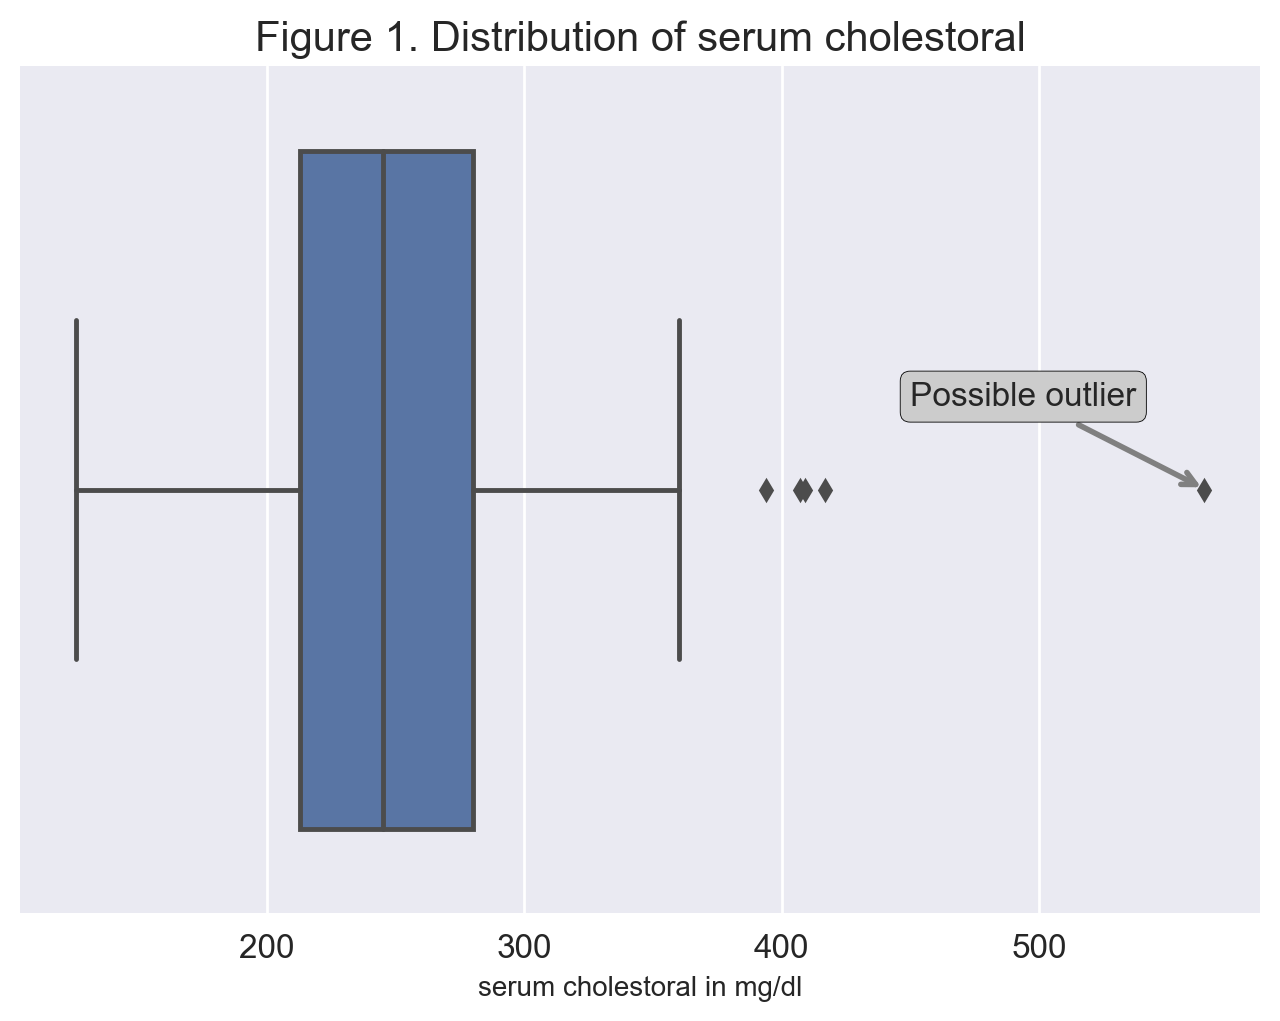

In [12]:
ax = sns.boxplot(df.SerumCholestoral)
sns.set_palette("pastel")
ax.annotate('Possible outlier', xy=(565,0), xytext=(450,-0.10), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
plt.xticks(fontsize=12)
plt.xlabel('serum cholestoral in mg/dl', fontsize=10)
plt.title('Figure 1. Distribution of serum cholestoral', fontsize=15)
plt.show()

There aren't many outliers in the dataset, as we can see in Figure 1. Although, manually removing them is not an effective approach to accomplish it. To remove them, we are going to use the standard deviation, which is the most commonly used approach. Using 3 standard deviations from the mean to distinguish between an outlier and a non-outlier is a common practice. By using three standard deviations, we can exclude the 0.3% outliers. In our particular case, we'll use 4 standard deviations to exclude the top 0.1%. This will only exclude 2 values from the dataset and reducing the number of observations to 268.

In [13]:
from scipy import stats
num_features = ['Age','RestBloodPressure','SerumCholestoral','MaxHeartRate','Oldpeak','MajorVessels']
df[(np.abs(stats.zscore(df[num_features])) < 4).all(axis=1)]

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
0,70,Male,Asymptomatic,130,322,Lower than 120mg/ml,Left Ventricular Hypertrophy,109,No,2.4,Flat,3,Normal,Absent
2,57,Male,Atypical angina,124,261,Lower than 120mg/ml,Normal,141,No,0.3,Upsloping,0,Reversable defect,Absent
3,64,Male,Asymptomatic,128,263,Lower than 120mg/ml,Normal,105,Yes,0.2,Flat,1,Reversable defect,Present
4,74,Female,Atypical angina,120,269,Lower than 120mg/ml,Left Ventricular Hypertrophy,121,Yes,0.2,Upsloping,1,Normal,Present
5,65,Male,Asymptomatic,120,177,Lower than 120mg/ml,Normal,140,No,0.4,Upsloping,0,Reversable defect,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,Male,Non-anginal pain,172,199,Greater than 120mg/ml,Normal,162,No,0.5,Upsloping,0,Reversable defect,Present
266,44,Male,Atypical angina,120,263,Lower than 120mg/ml,Normal,173,No,0.0,Upsloping,0,Reversable defect,Present
267,56,Female,Atypical angina,140,294,Lower than 120mg/ml,Left Ventricular Hypertrophy,153,No,1.3,Flat,0,Normal,Present
268,57,Male,Asymptomatic,140,192,Lower than 120mg/ml,Normal,148,No,0.4,Flat,0,Fixed defect,Present


### 3.5 Dealing with missing values

Missing values are identified by showing the number of missing values in each column. Our dataset has no missing values.

In [14]:
print(f"\nNumber of missing values for each column:")
df.isna().sum()


Number of missing values for each column:


Age                        0
Sex                        0
ChestPainType              0
RestBloodPressure          0
SerumCholestoral           0
FastingBloodSugar          0
ResElectrocardiographic    0
MaxHeartRate               0
ExerciseInduced            0
Oldpeak                    0
Slope                      0
MajorVessels               0
Thal                       0
Class                      0
dtype: int64

## 4. Data Exploration and Visualisation


### 4.1 Univariate Visualisation

#### Bar Chart of the dependent variable `Class`

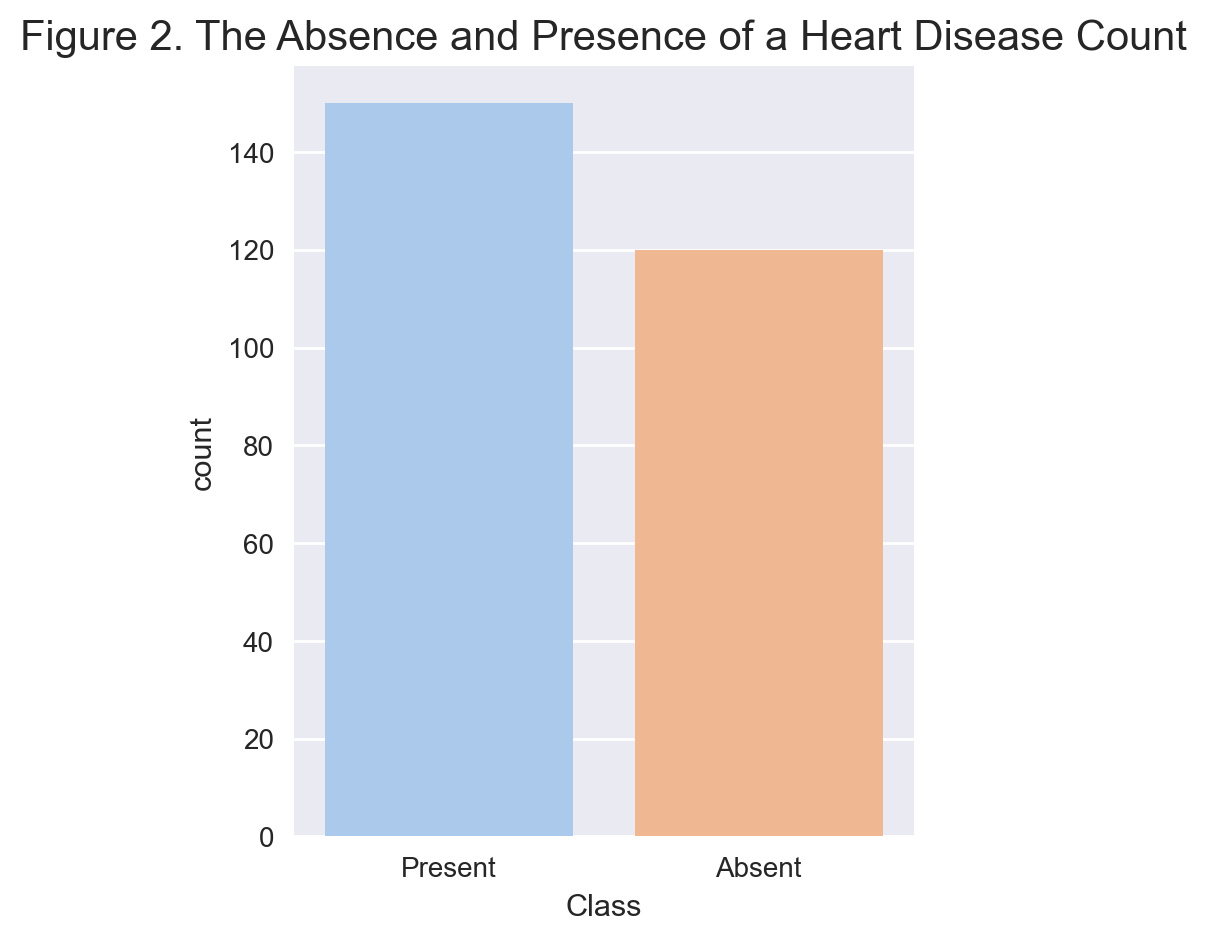

In [15]:
plt.figure(figsize = (4,5))
sns.set_palette("pastel")
fig = sns.countplot(x = 'Class', data = df, order = df['Class'].value_counts().index)
fig = plt.title('Figure 2. The Absence and Presence of a Heart Disease Count', fontsize = 15)
plt.show()

Figure 2. shows the distribution of the presence or absence of a heart disease. We can see a close balance between the positive and negative cases.

#### Bar Charts of the Nominal Categorical Variables

Figure3. below shows multiple plots for nominal categorical features in the dataset. These plots consist of the count of each category in these variables.

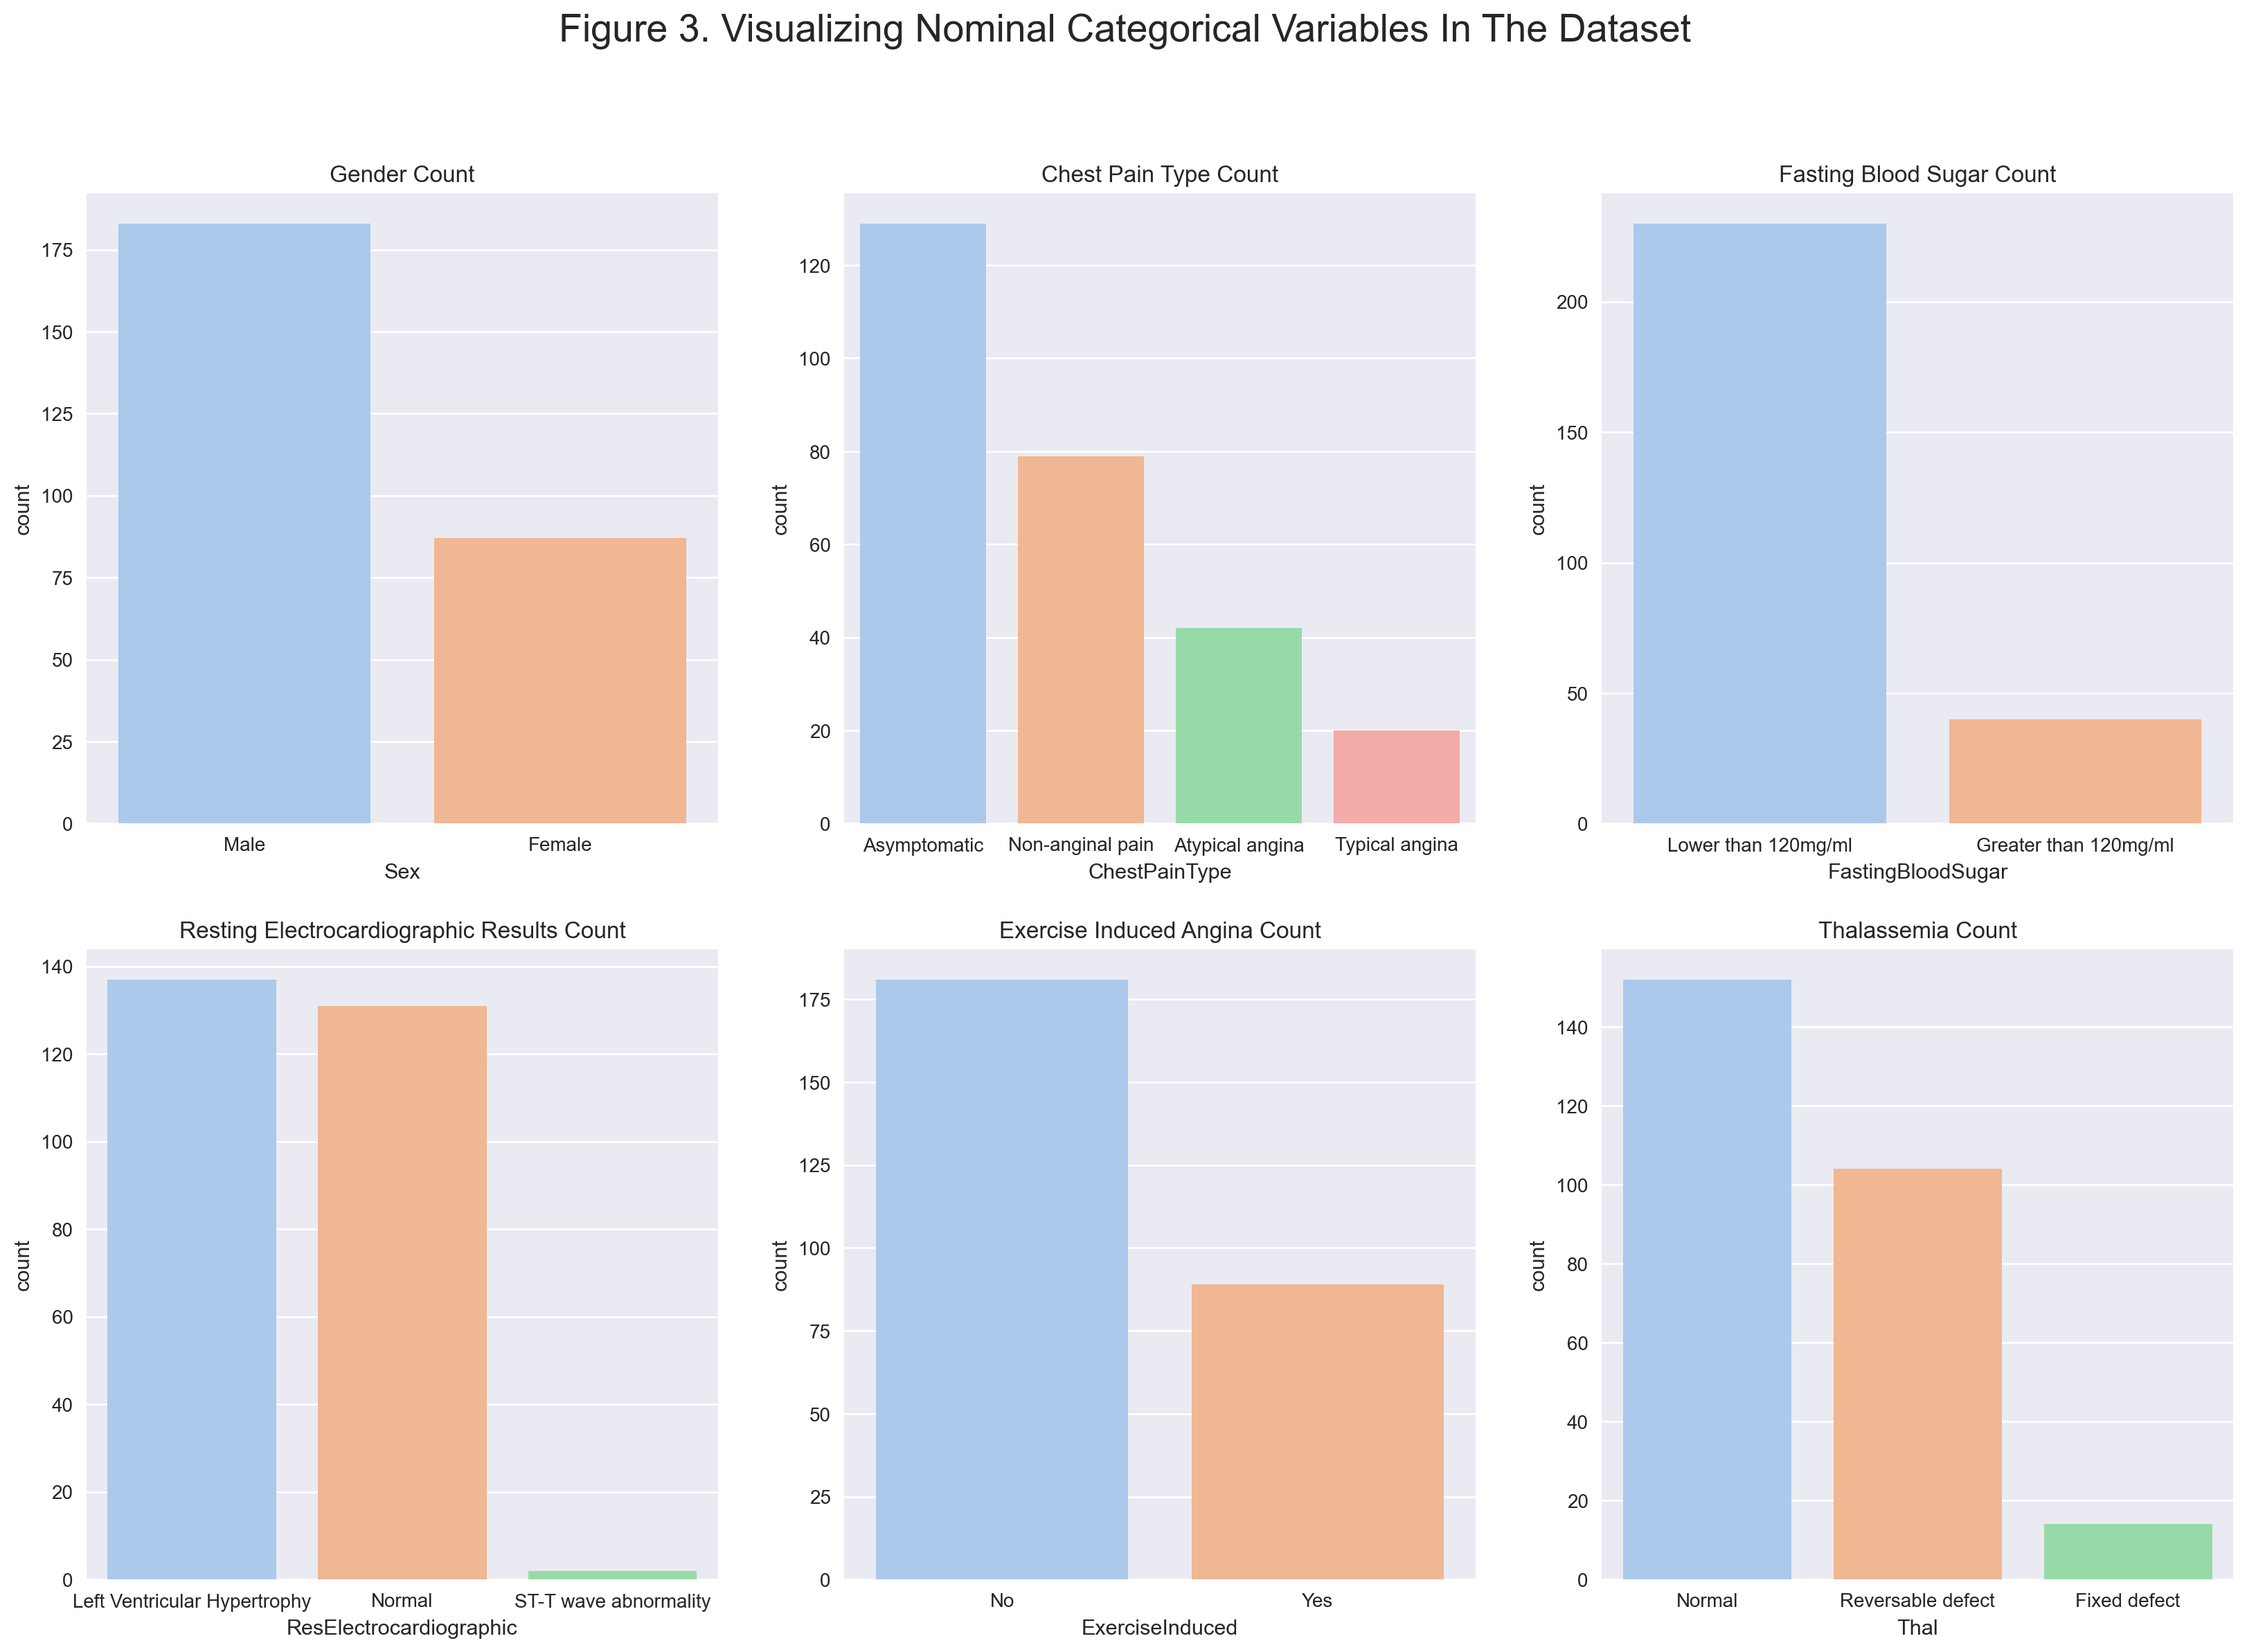

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20,13))
fig.suptitle('Figure 3. Visualizing Nominal Categorical Variables In The Dataset', fontsize = 20)
axes[0,0].set_title('Gender Count')
axes[0,1].set_title('Chest Pain Type Count')
axes[0,2].set_title('Fasting Blood Sugar Count')
axes[1,0].set_title('Resting Electrocardiographic Results Count')
axes[1,1].set_title('Exercise Induced Angina Count')
axes[1,2].set_title('Thalassemia Count')

sns.countplot(ax=axes[0, 0], data=df, x='Sex')
sns.countplot(ax=axes[0, 1], data=df, x='ChestPainType')
sns.countplot(ax=axes[0, 2], data=df, x='FastingBloodSugar')
sns.countplot(ax=axes[1, 0], data=df, x='ResElectrocardiographic')
sns.countplot(ax=axes[1, 1], data=df, x='ExerciseInduced')
sns.countplot(ax=axes[1, 2], data=df, x='Thal')
plt.show()

#### Bar Chart of the Ordinal Categorical Variable `Slope`

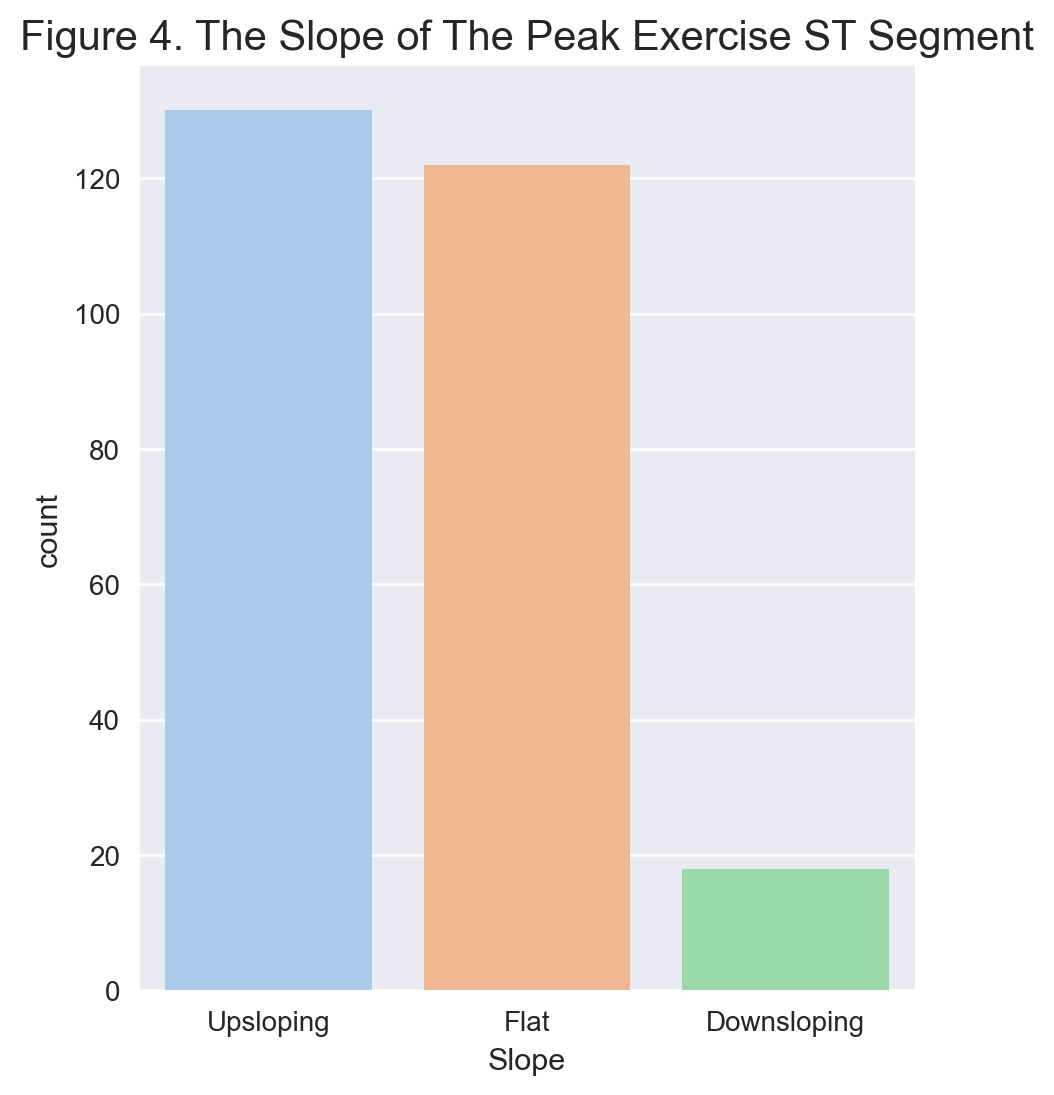

In [17]:
plt.figure(figsize = (5,6))
fig = sns.countplot(x = 'Slope', data = df, order = df['Slope'].value_counts().index)
fig = plt.title('Figure 4. The Slope of The Peak Exercise ST Segment', fontsize = 15)
plt.show()

The above Figure 4. shows the distribution of the ordinal categorical variable in the dataset with an ordered category.

#### Boxplot of Resting Blood Pressure

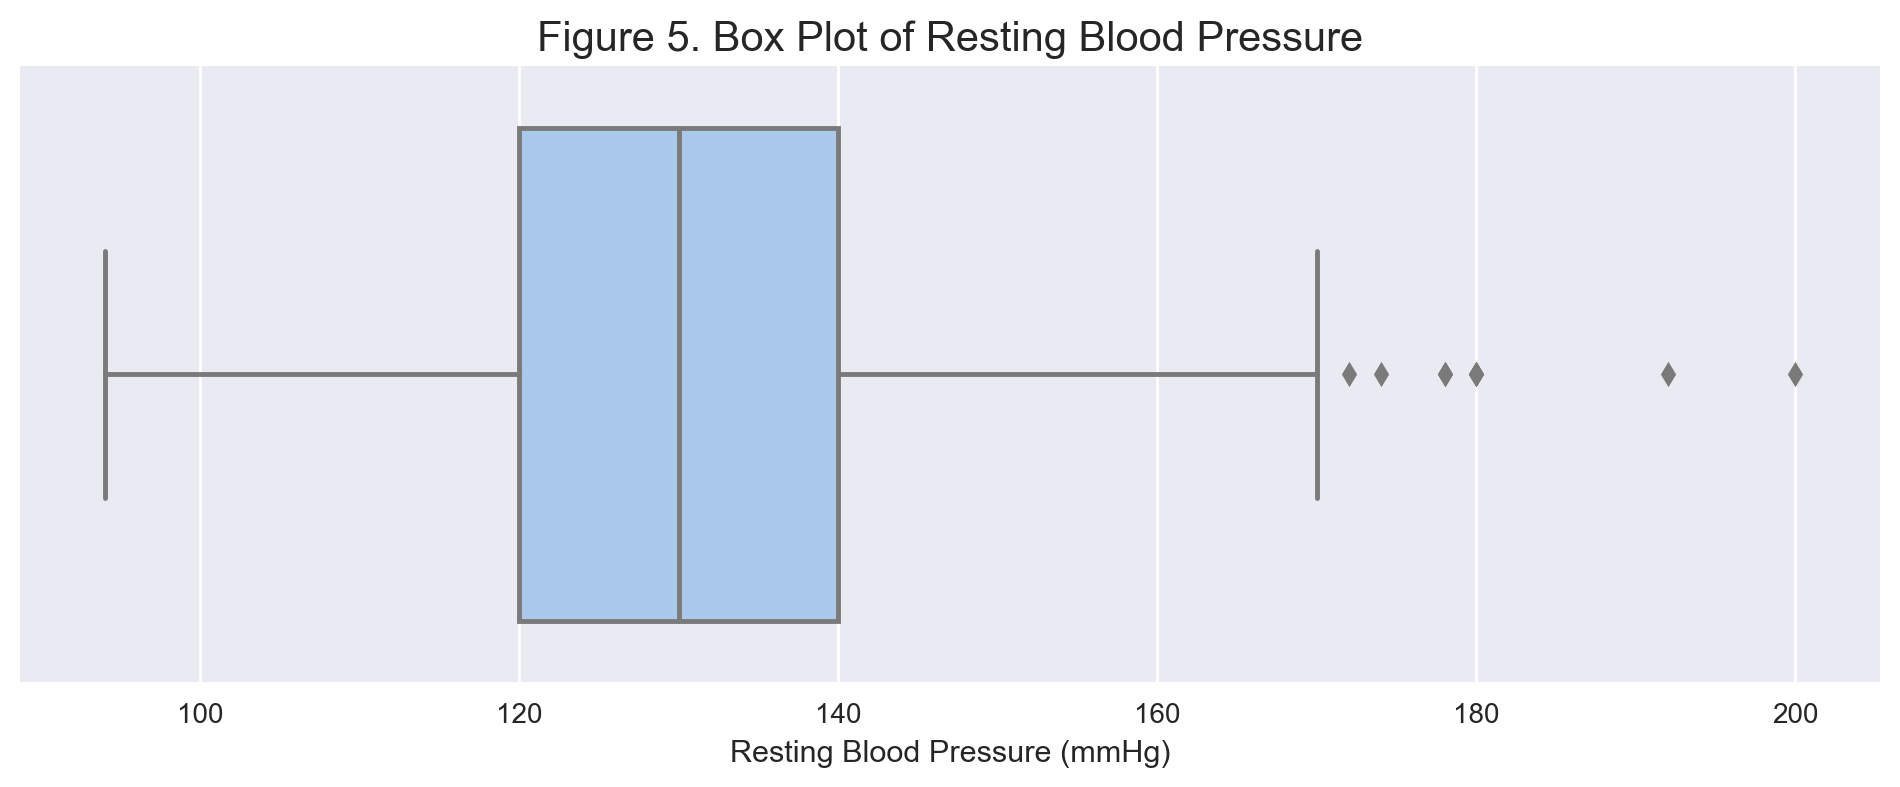

In [18]:
plt.figure(figsize = (12,4))
sns.boxplot(df.RestBloodPressure).set_title('Figure 5. Box Plot of Resting Blood Pressure', fontsize = 15)
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.show();

Figure 5. The boxplot displays the distribution of the feature Resting Blood Pressure. The mean Resting Blood Pressure is represented by the horizontal line inside the box, which is positioned at 131.

### 4.2 Two-Variable Visualisation

#### Scatterplot of Age and Resting Blood Pressure

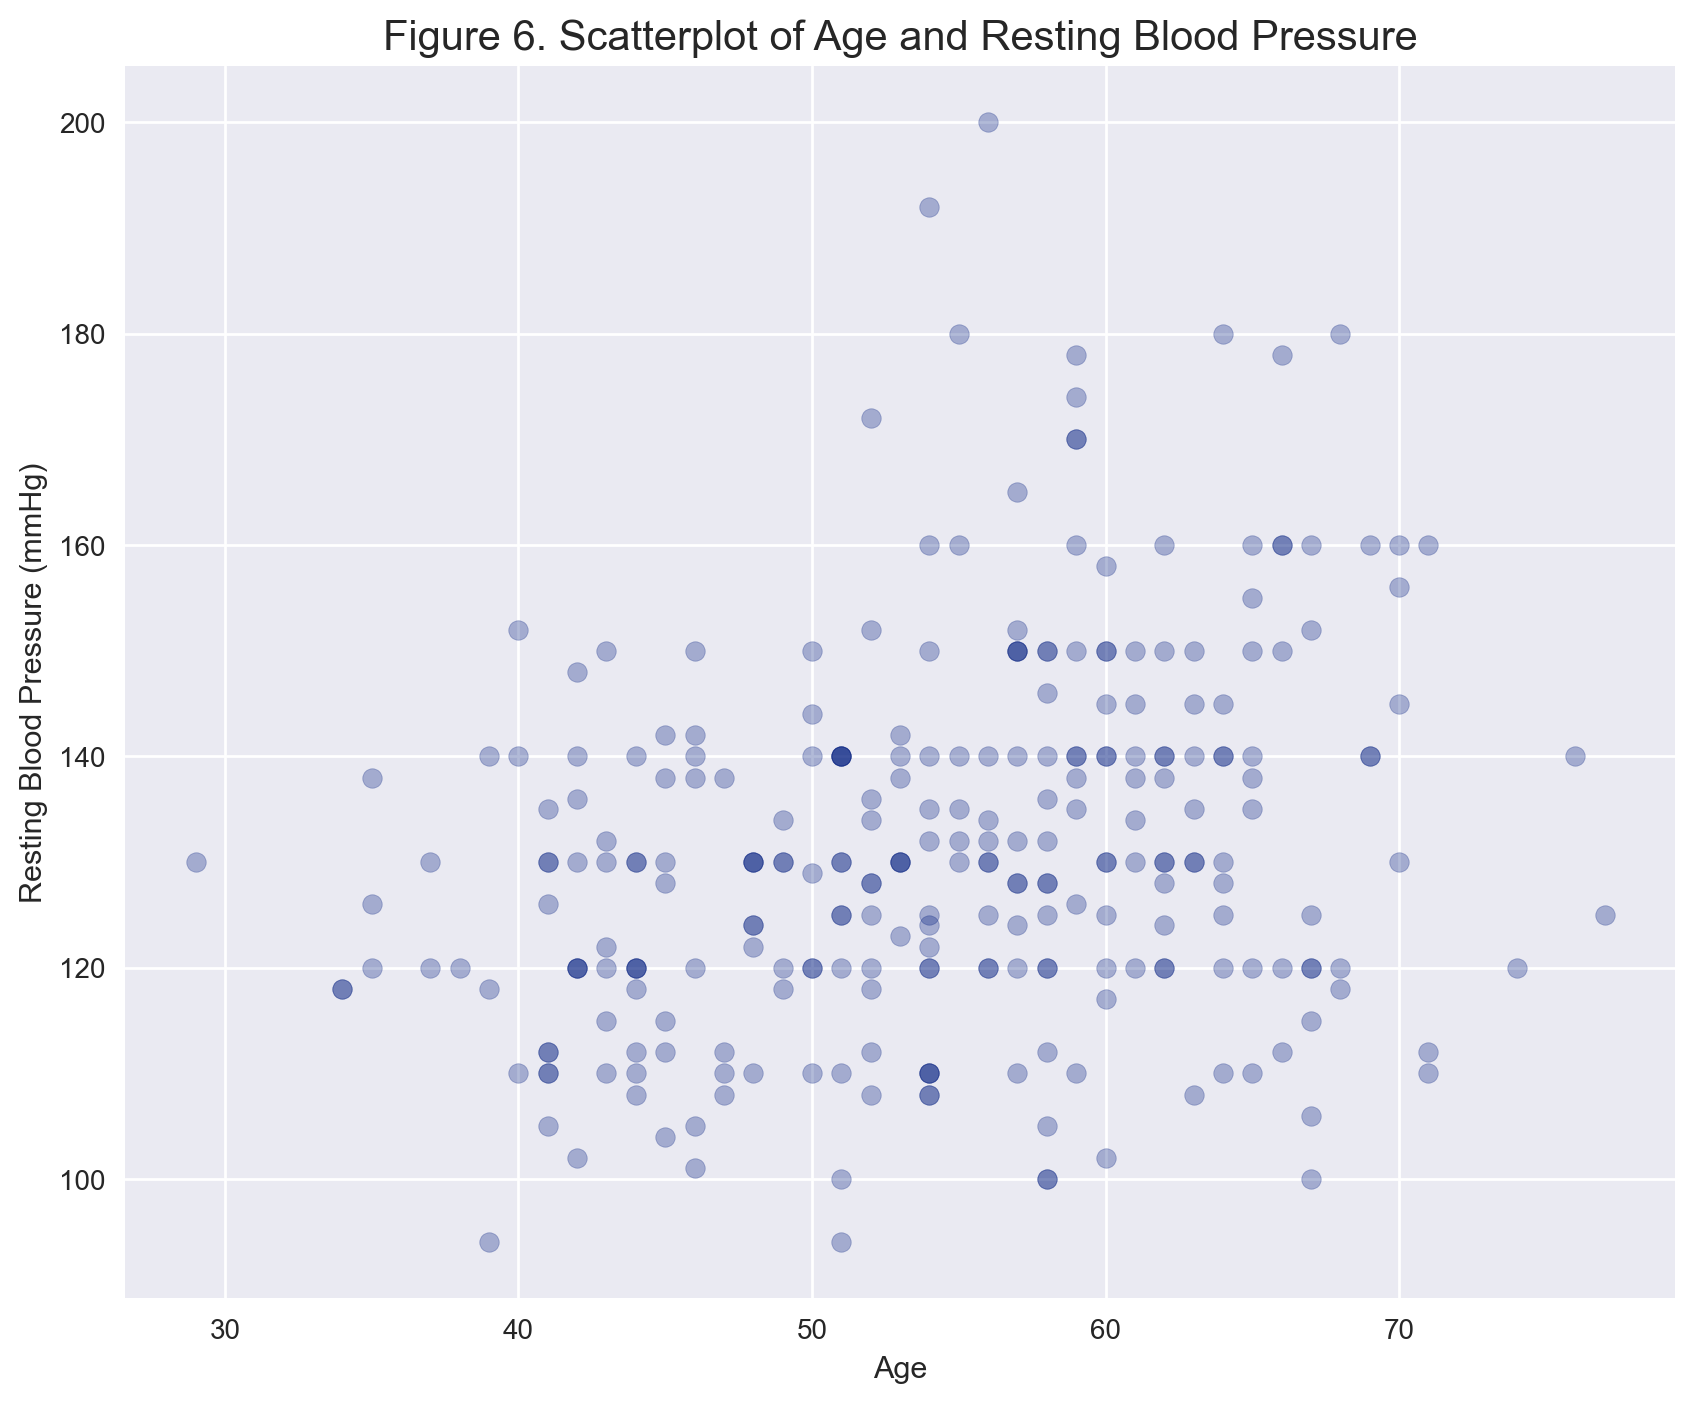

In [19]:
sns.set_palette("dark")
plt.figure(figsize = (10,8))
plt.scatter(df['Age'], df['RestBloodPressure'], alpha = 0.3)
plt.title('Figure 6. Scatterplot of Age and Resting Blood Pressure', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.show();

The scatterplot in Figure 6. displays the relationship between Age and Resting Blood Pressure for our 268 observations. Each dot on the plot represents a patients' data point, with the x-axis showing age in years and the y-axis showing resting blood pressure in (mmHg). The scatterplot indicates a small positive correlation between age and resting blood pressure, showing that as people become older, their resting blood pressure tends to rise slightly.

#### Scatterplot of Age and Maximum Heart Rate Achieved

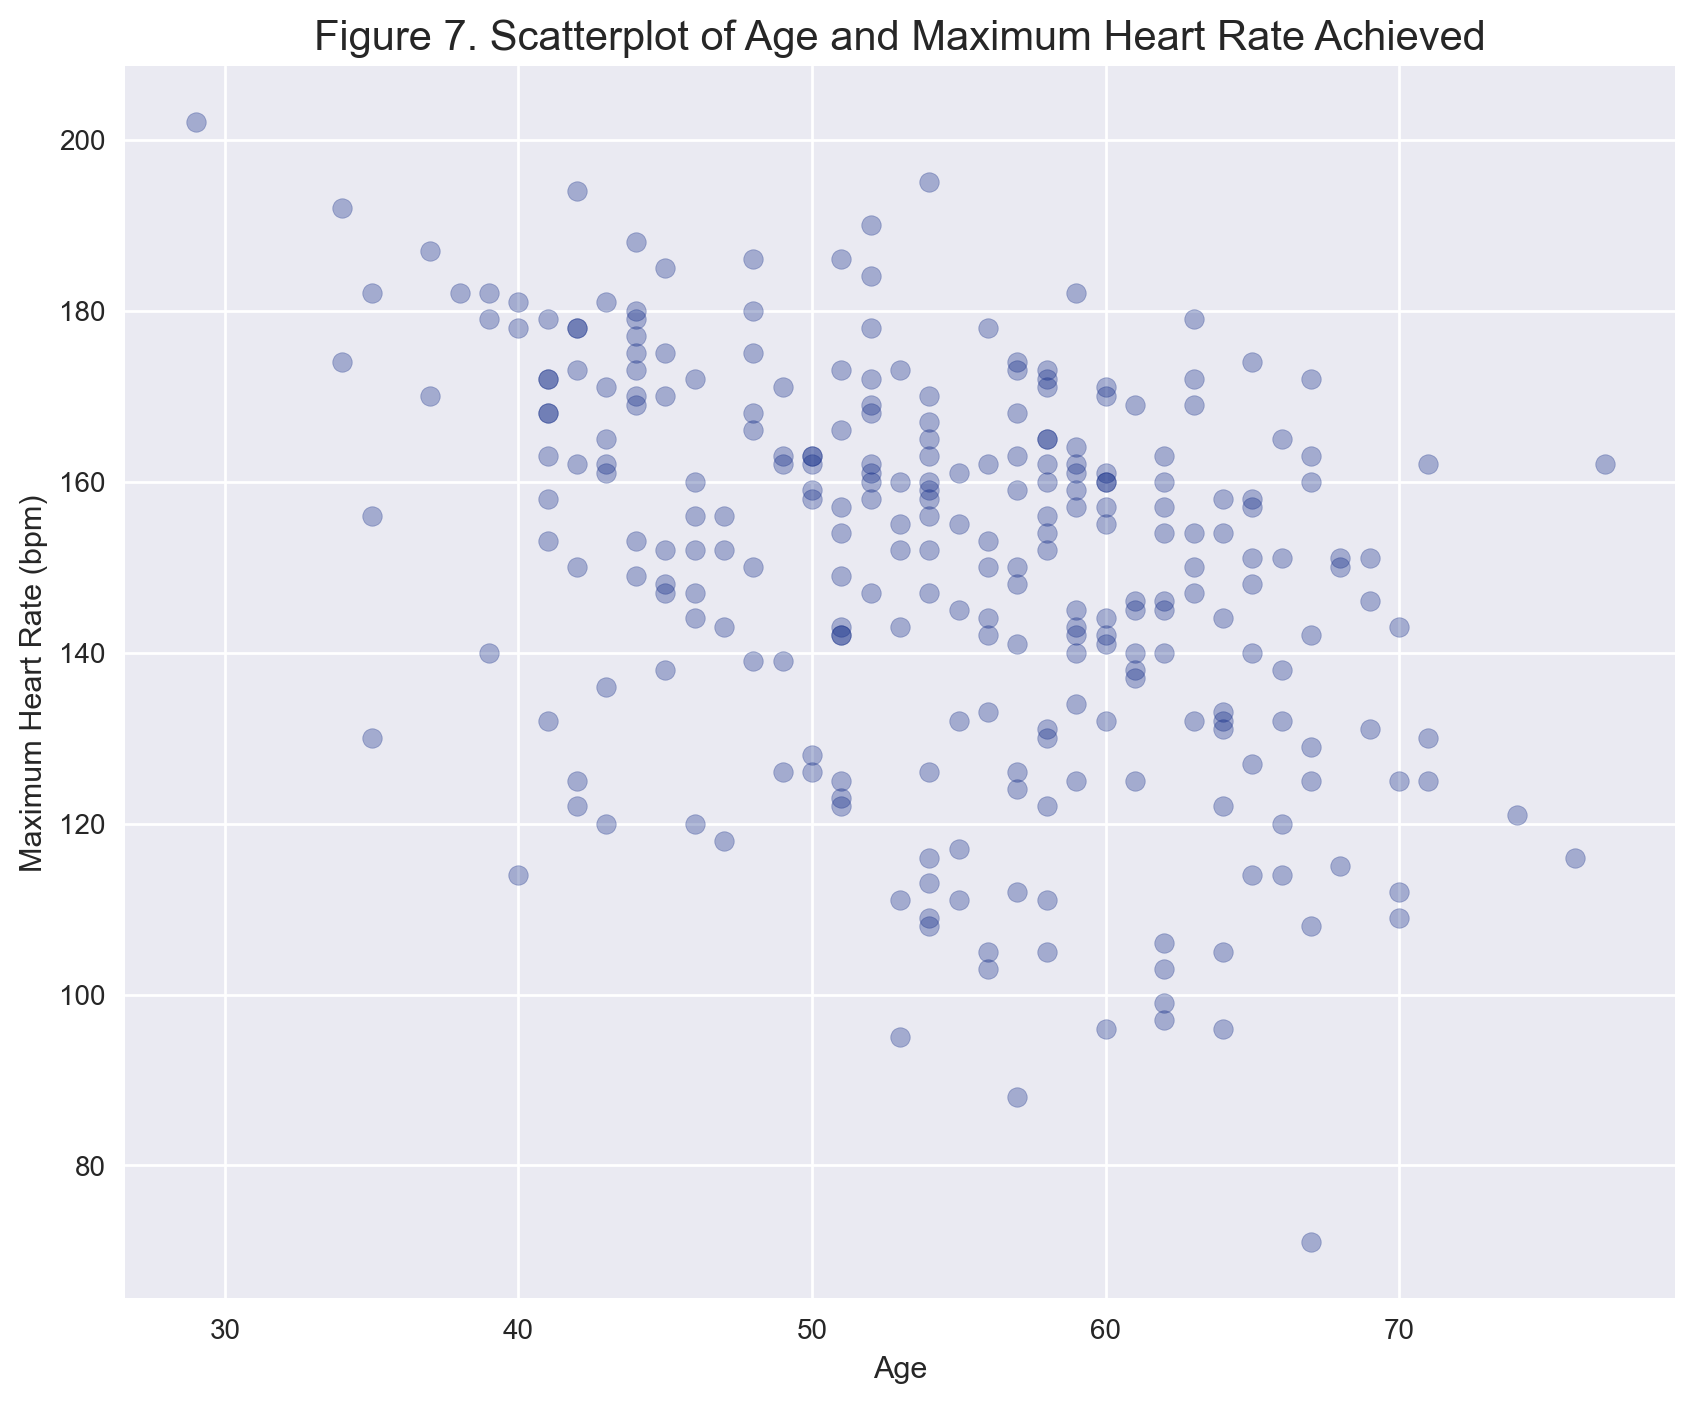

In [20]:
plt.figure(figsize = (10,8))
plt.scatter(df['Age'], df['MaxHeartRate'], alpha = 0.3)
plt.title('Figure 7. Scatterplot of Age and Maximum Heart Rate Achieved', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.show();

Figure 7. above shows a scatterplot of the relationship between age and maximum heart rate achieved during exercise. The scatterplot shows a slightly negative relationship between age and maximum heart rate reached, suggesting that as people age, their ability to exercise at a maximum heart rate tends to decline.

#### Boxplot of Maximum Heart Rate Achieved By Gender

The boxplot in Figure 8. below displays the distribution of maximum heart rate achieved during exercise split by gender. The boxplots reveal some interesting differences between males and females. Females have a higher median maximum heart rate achieved than males.

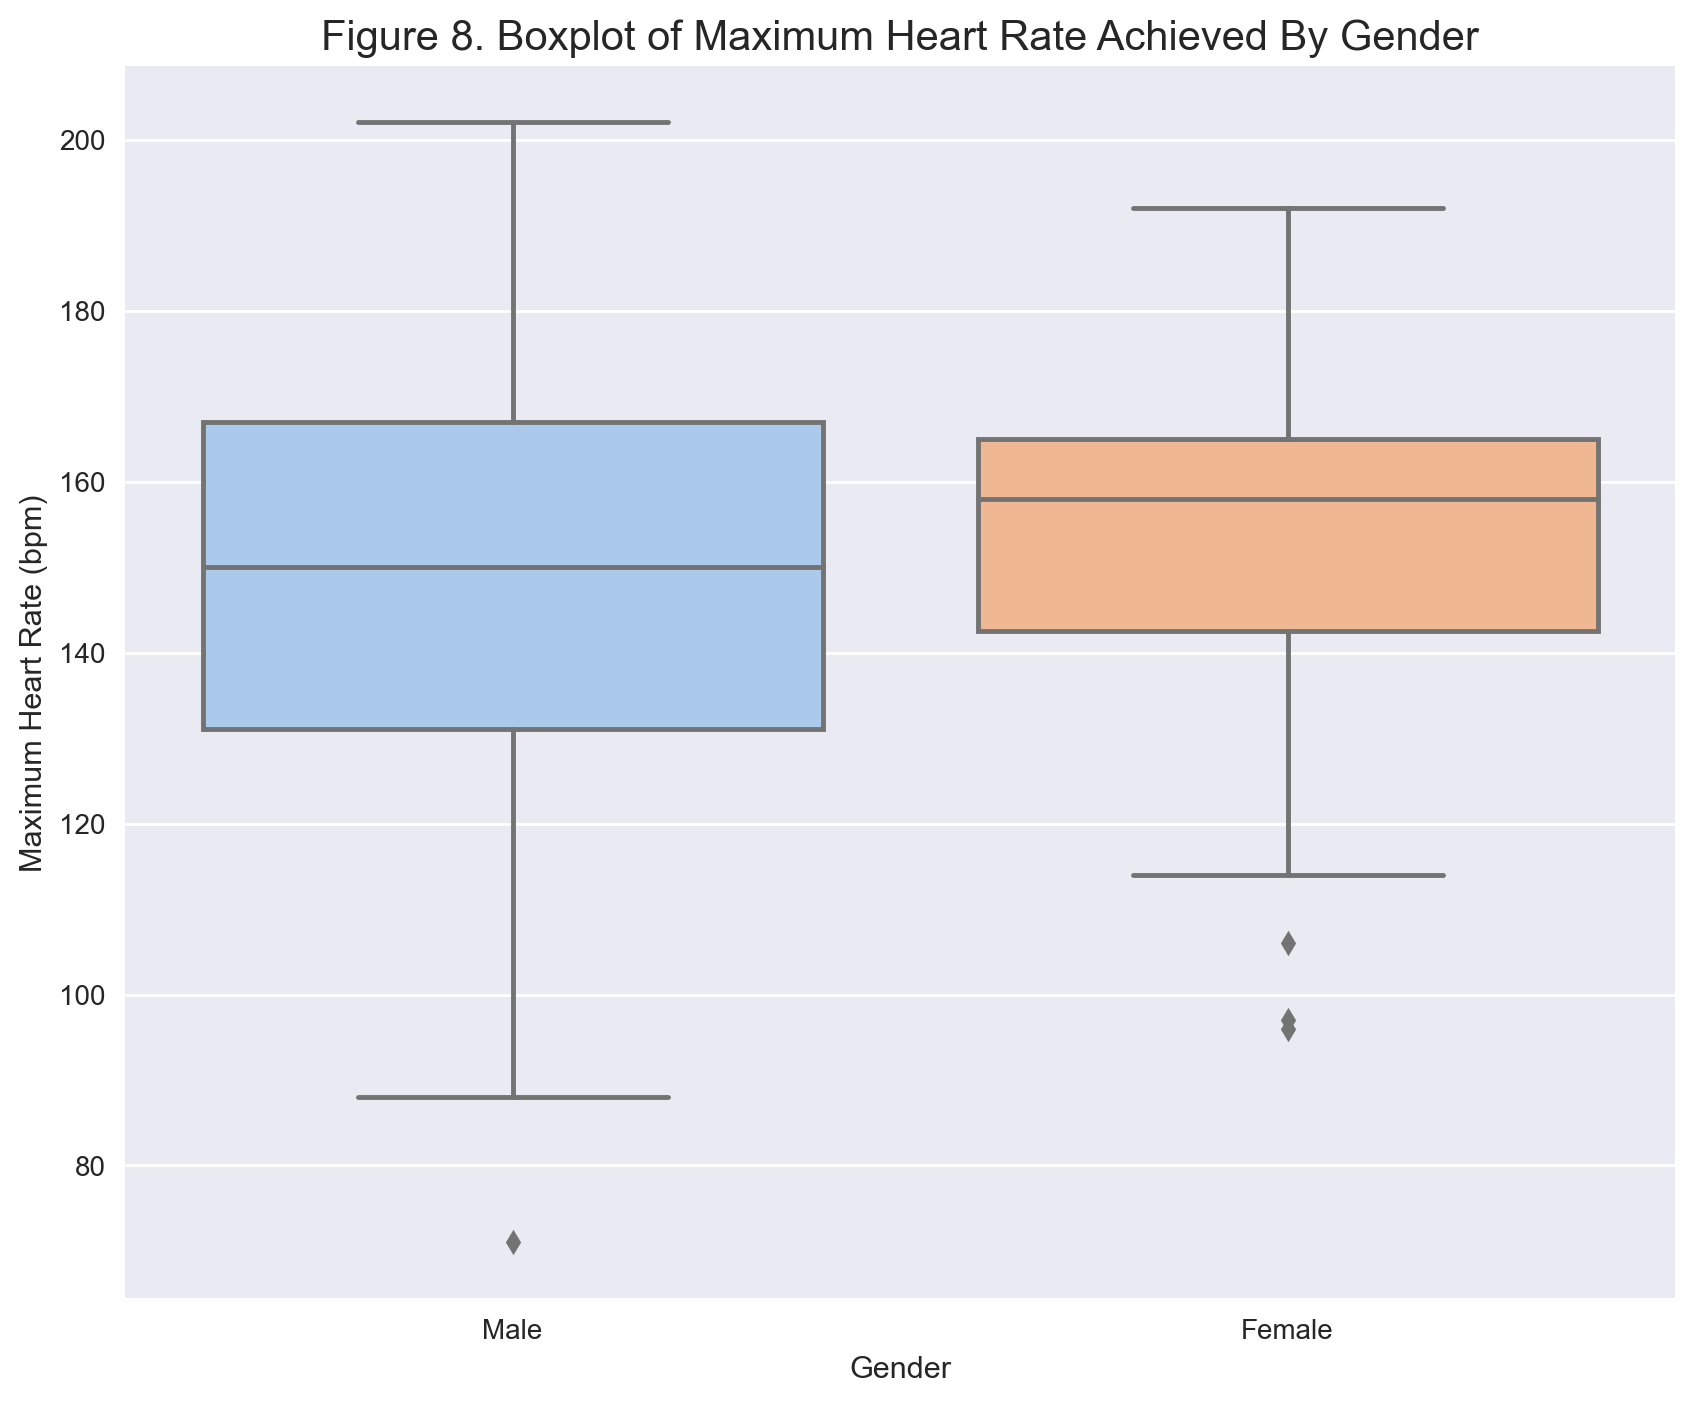

In [21]:
plt.figure(figsize = (10,8))
sns.set_palette("pastel")
sns.boxplot(df['Sex'], df['MaxHeartRate']);
plt.xlabel('Gender')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.title('Figure 8. Boxplot of Maximum Heart Rate Achieved By Gender', fontsize = 15)
plt.show();

#### Boxplot of Heart Disease and Maximum Heart Rate

The boxplot in Figure 9. displays the distribution of maximum heart rate achieved during exercise for two groups: those with heart disease and those without heart disease. 

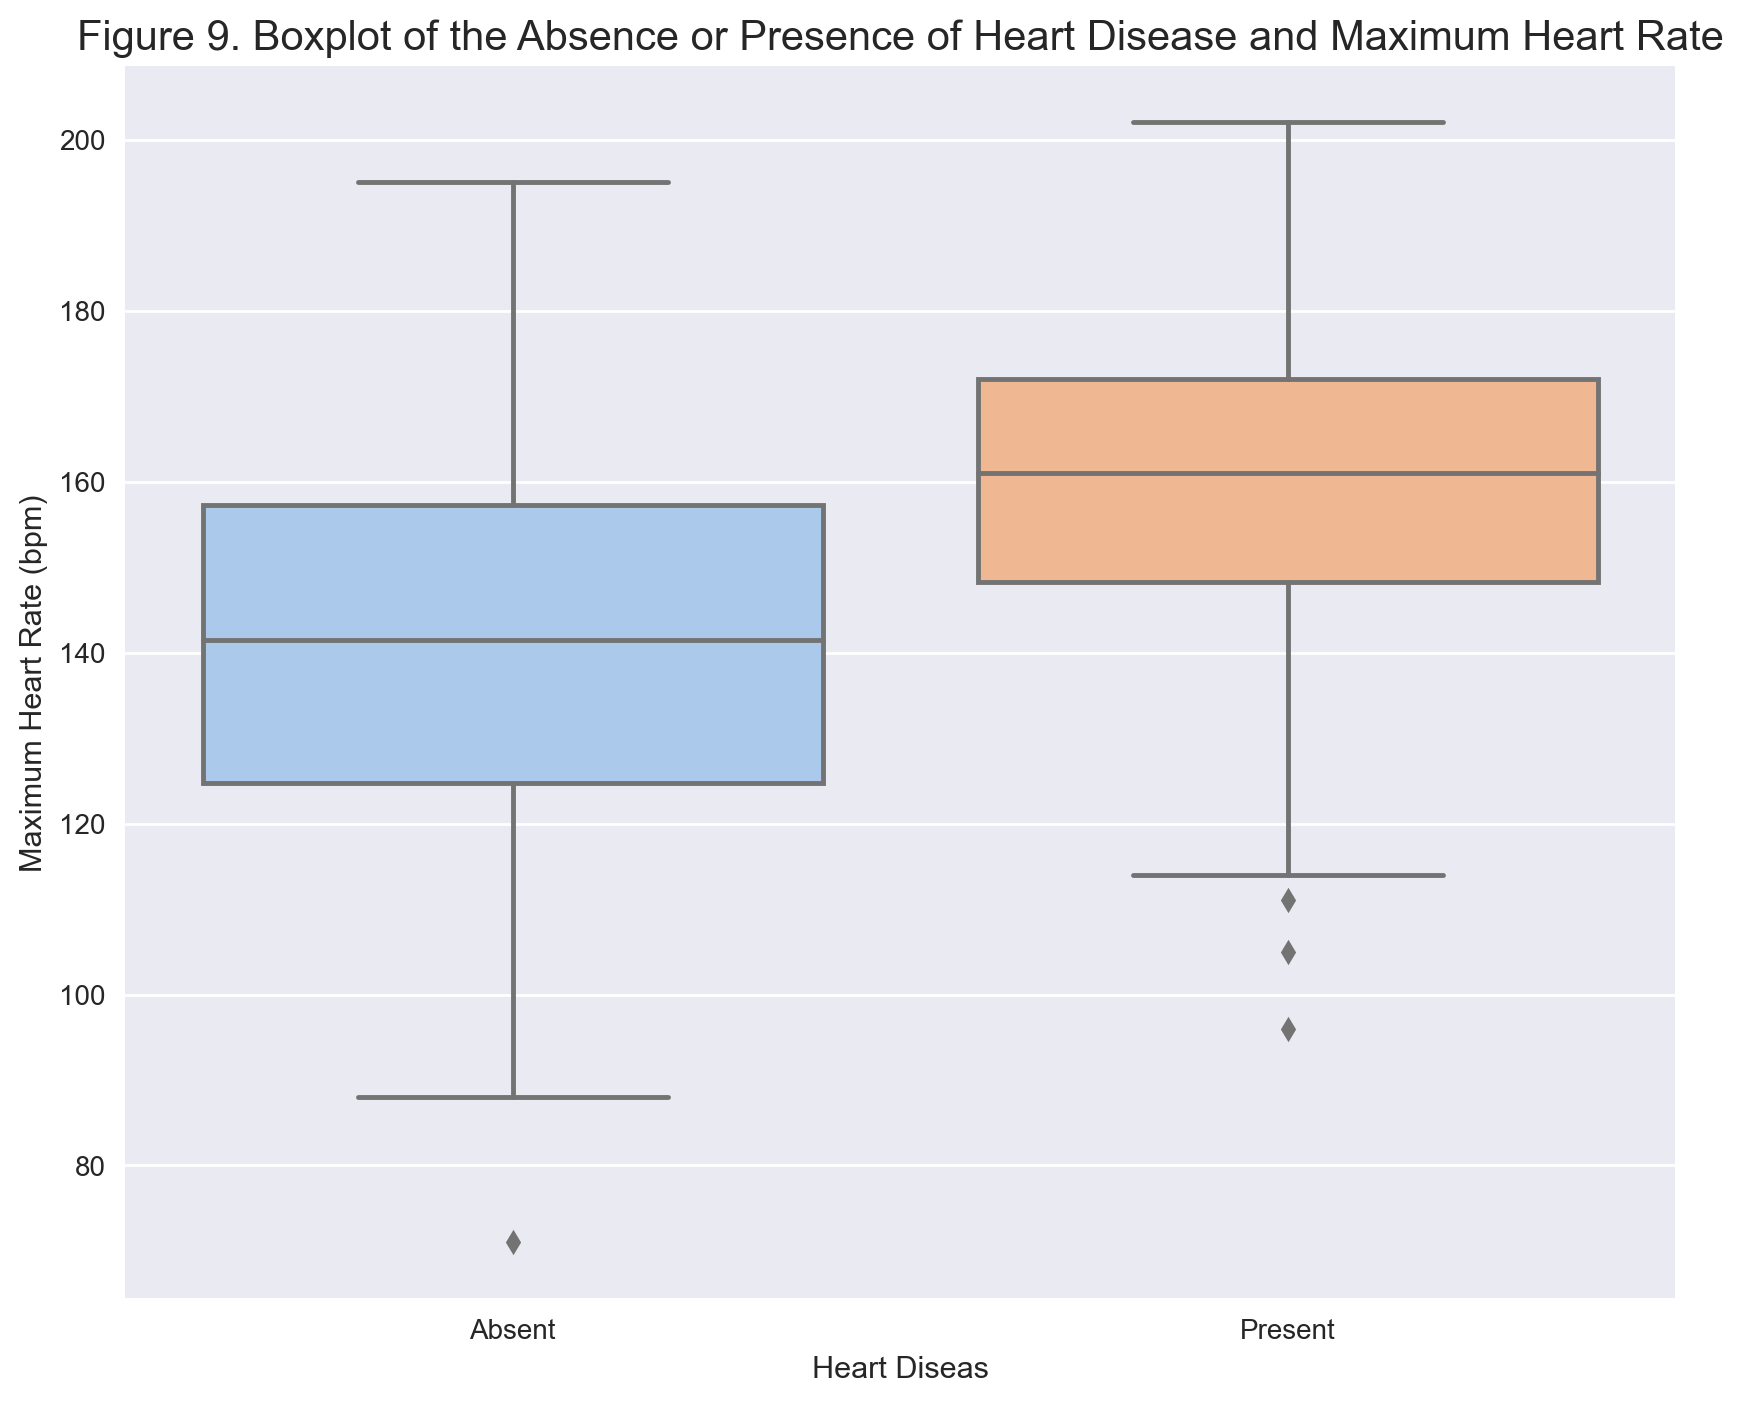

In [22]:
plt.figure(figsize = (10,8))
sns.boxplot(df['Class'], df['MaxHeartRate']);
plt.xlabel('Heart Diseas')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.title('Figure 9. Boxplot of the Absence or Presence of Heart Disease and Maximum Heart Rate', fontsize = 15)
plt.show();

### 4.3 Three-Variable Visualisation

#### Boxplot of Age broken down by Chest Pain Type and Gender

Figure 10. shows a boxplot of the distribution of age for males and females with four types of chest pain: asymptomatic chest pain, non-anginal pain, atypical angina, and typical angina. The boxplot highlights some differences between men and women. For asymptomatic, non-anginal pain, and typical angina women tend to be older than men, while men tend to be older than women for atypical angina.

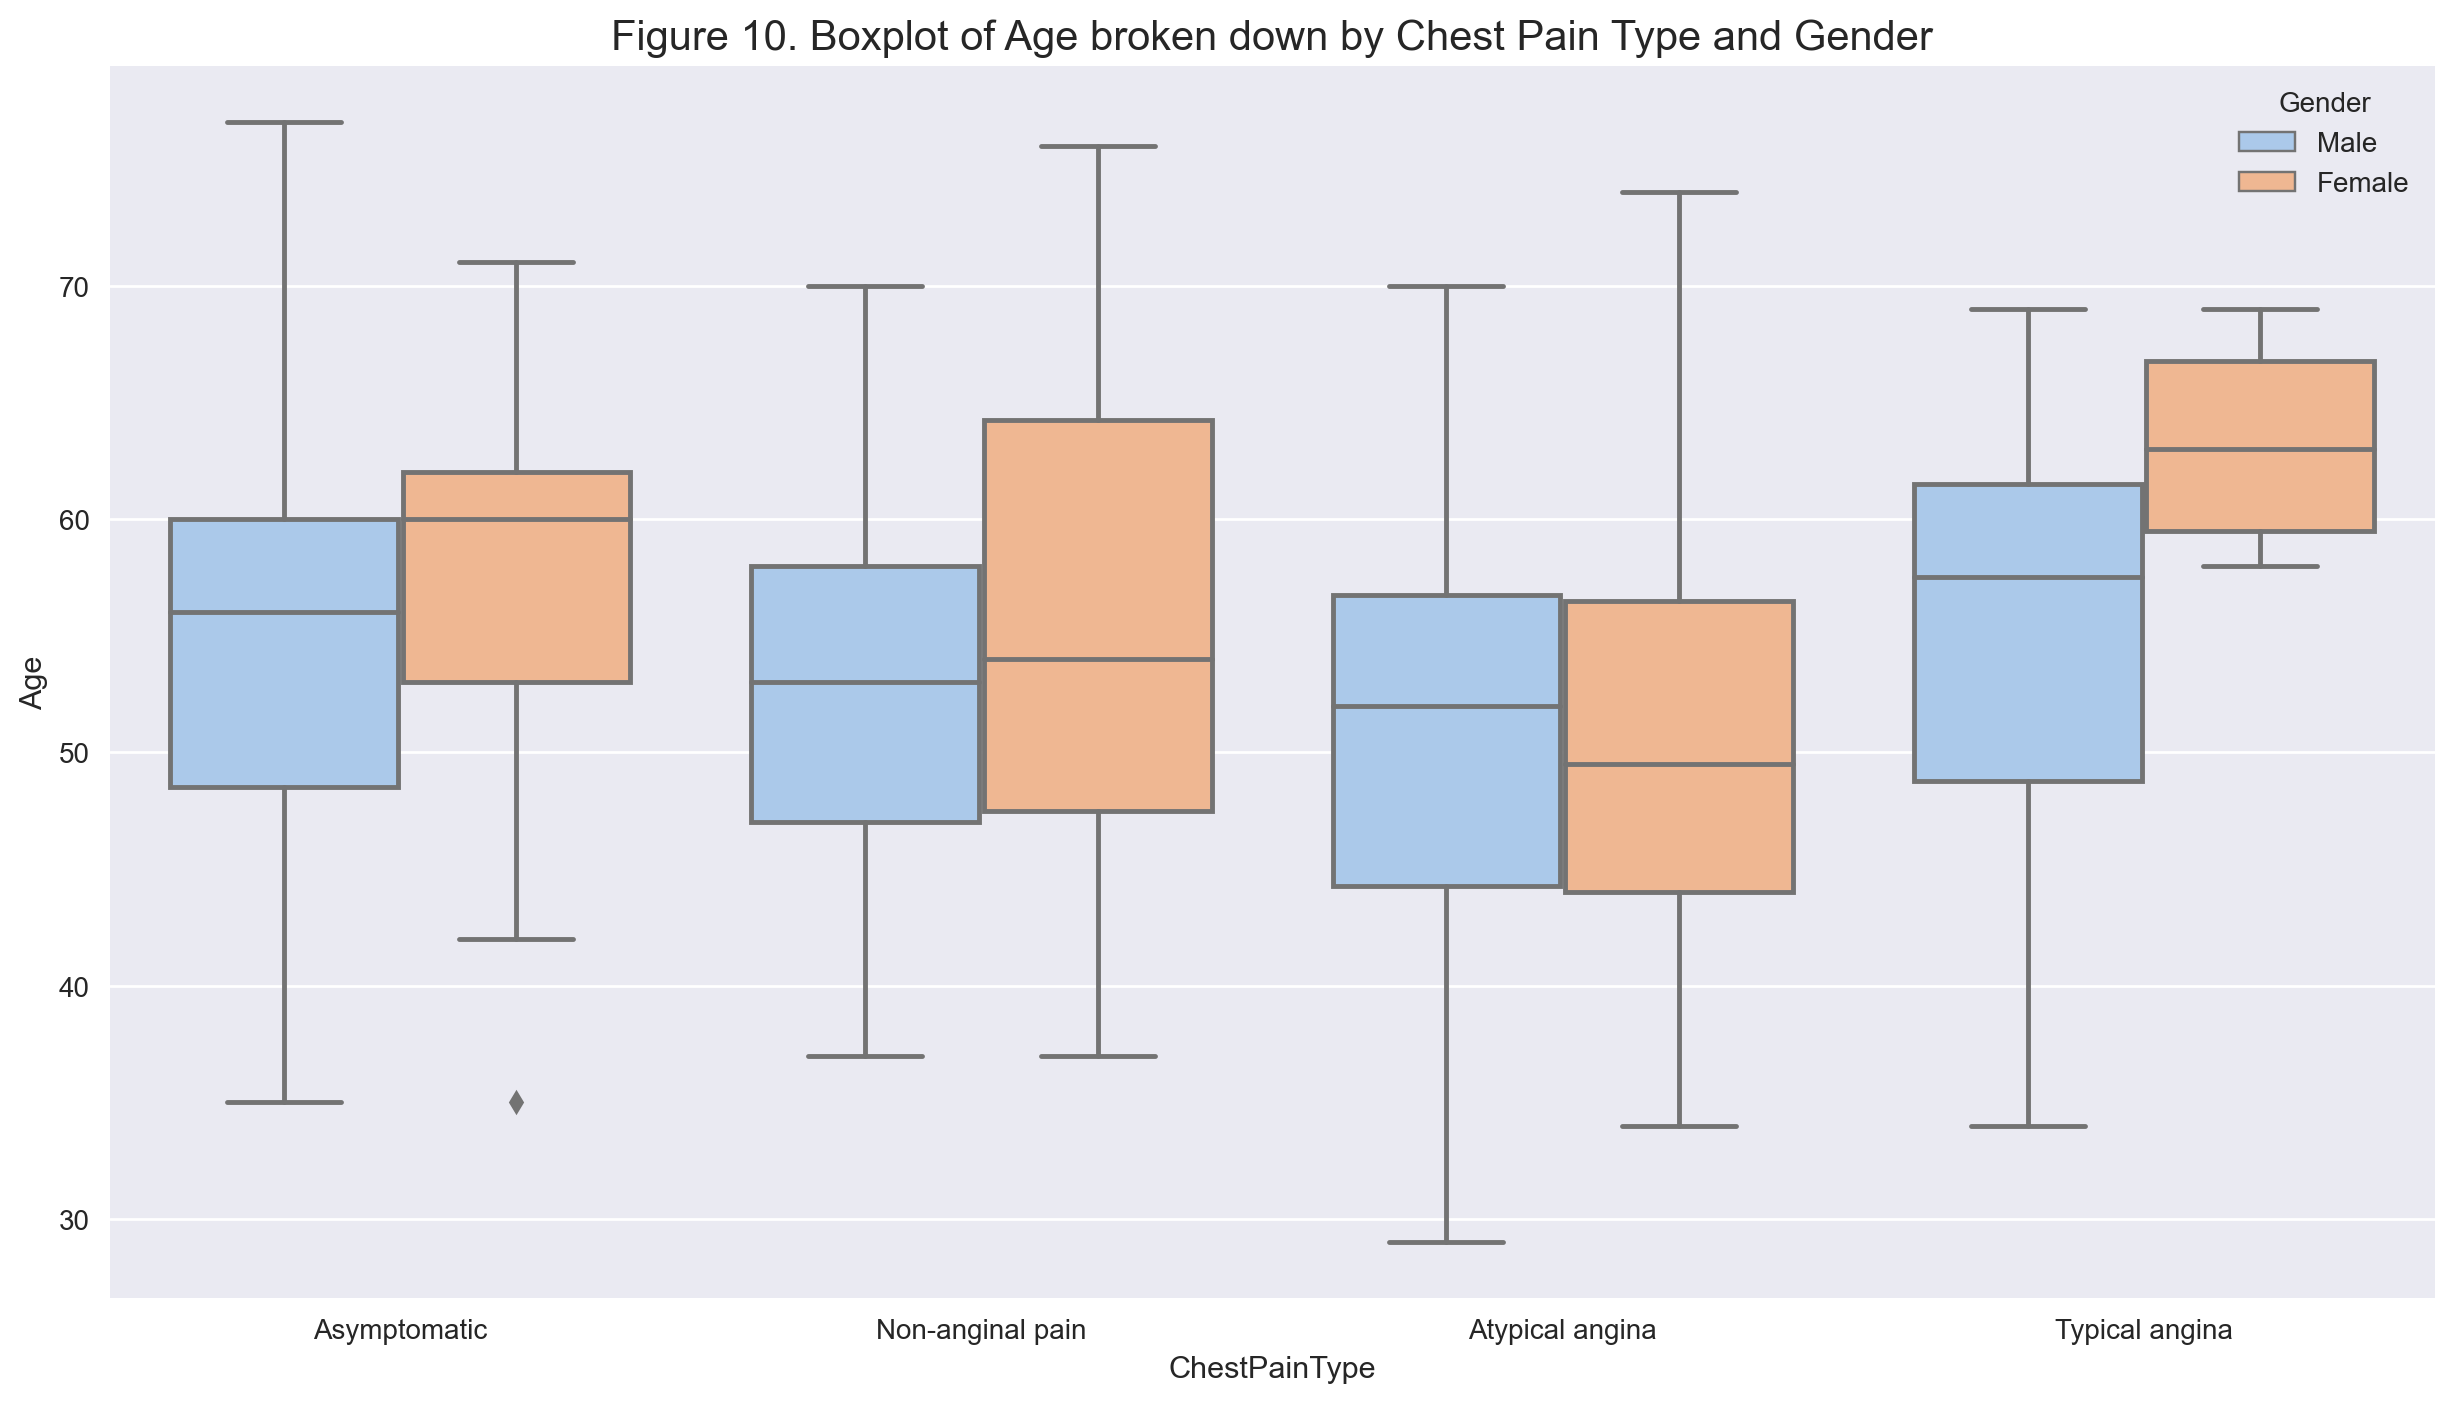

In [23]:
plt.figure(figsize = (15,8))
sns.boxplot(df['ChestPainType'], df['Age'], 
            hue = df['Sex'])
plt.title('Figure 10. Boxplot of Age broken down by Chest Pain Type and Gender', fontsize = 15)
plt.legend(title='Gender')
plt.show();

#### Boxplot of Resting Blood Pressure broken down by Heart Disease and The Slope of the Peak Exercise ST Segment

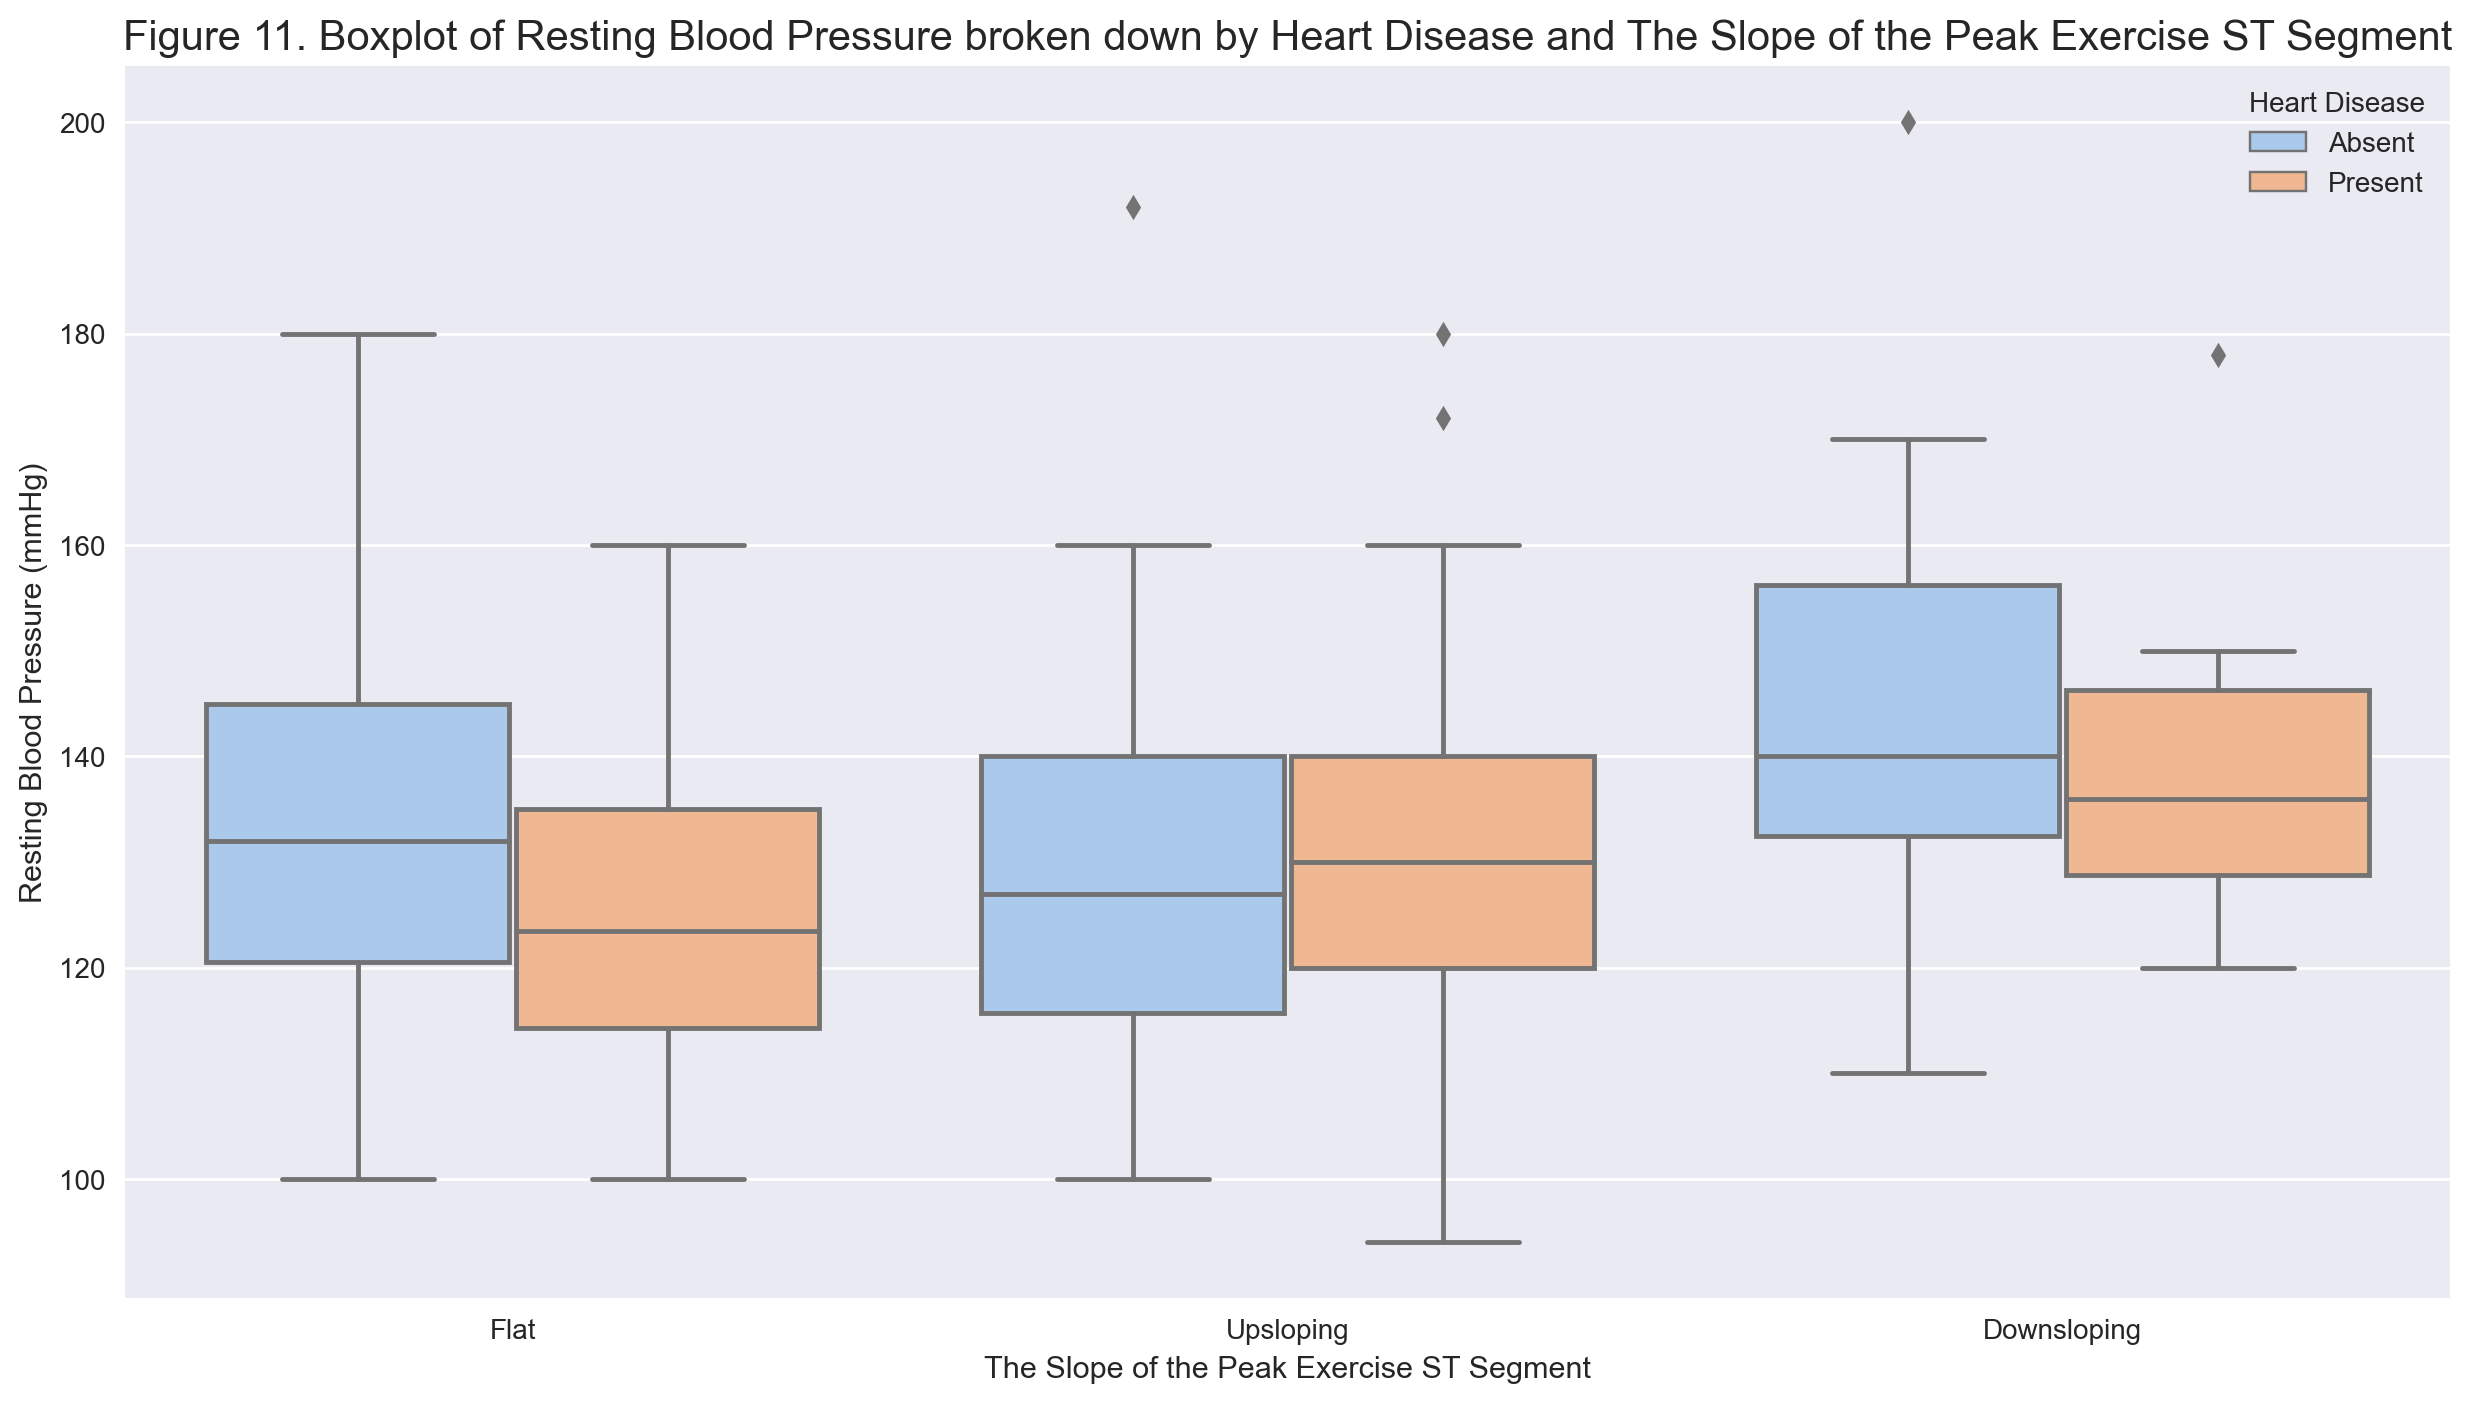

In [24]:
plt.figure(figsize = (15,8))
sns.boxplot(df['Slope'], df['RestBloodPressure'], 
            hue = df['Class'])
plt.title('Figure 11. Boxplot of Resting Blood Pressure broken down by Heart Disease and The Slope of the Peak Exercise ST Segment', fontsize = 15)
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.xlabel('The Slope of the Peak Exercise ST Segment')
plt.legend(title='Heart Disease')
plt.show();

The boxplot in Figure 11. shows the distribution of resting blood pressure for two categories: the presence or absence of heart disease and the slope of the peak exercise ST segment (upsloping, flat, or downsloping). For the absence of heart disease, the boxplot shows that the median resting blood pressure is slightly higher for patients with a flat and downsloping ST segment slope compared to those with upsloping ST segment slope.

#### Scatterplot of Maximum Heart Rate by Resting Blood Pressure and Gender

Figure 12. below shows a scatterplot of the relationship between maximum heart rate achieved and resting blood pressure with data points coloured by gender. The figure indicates that there is no significant difference in the correlation between maximum heart rate and resting blood pressure.

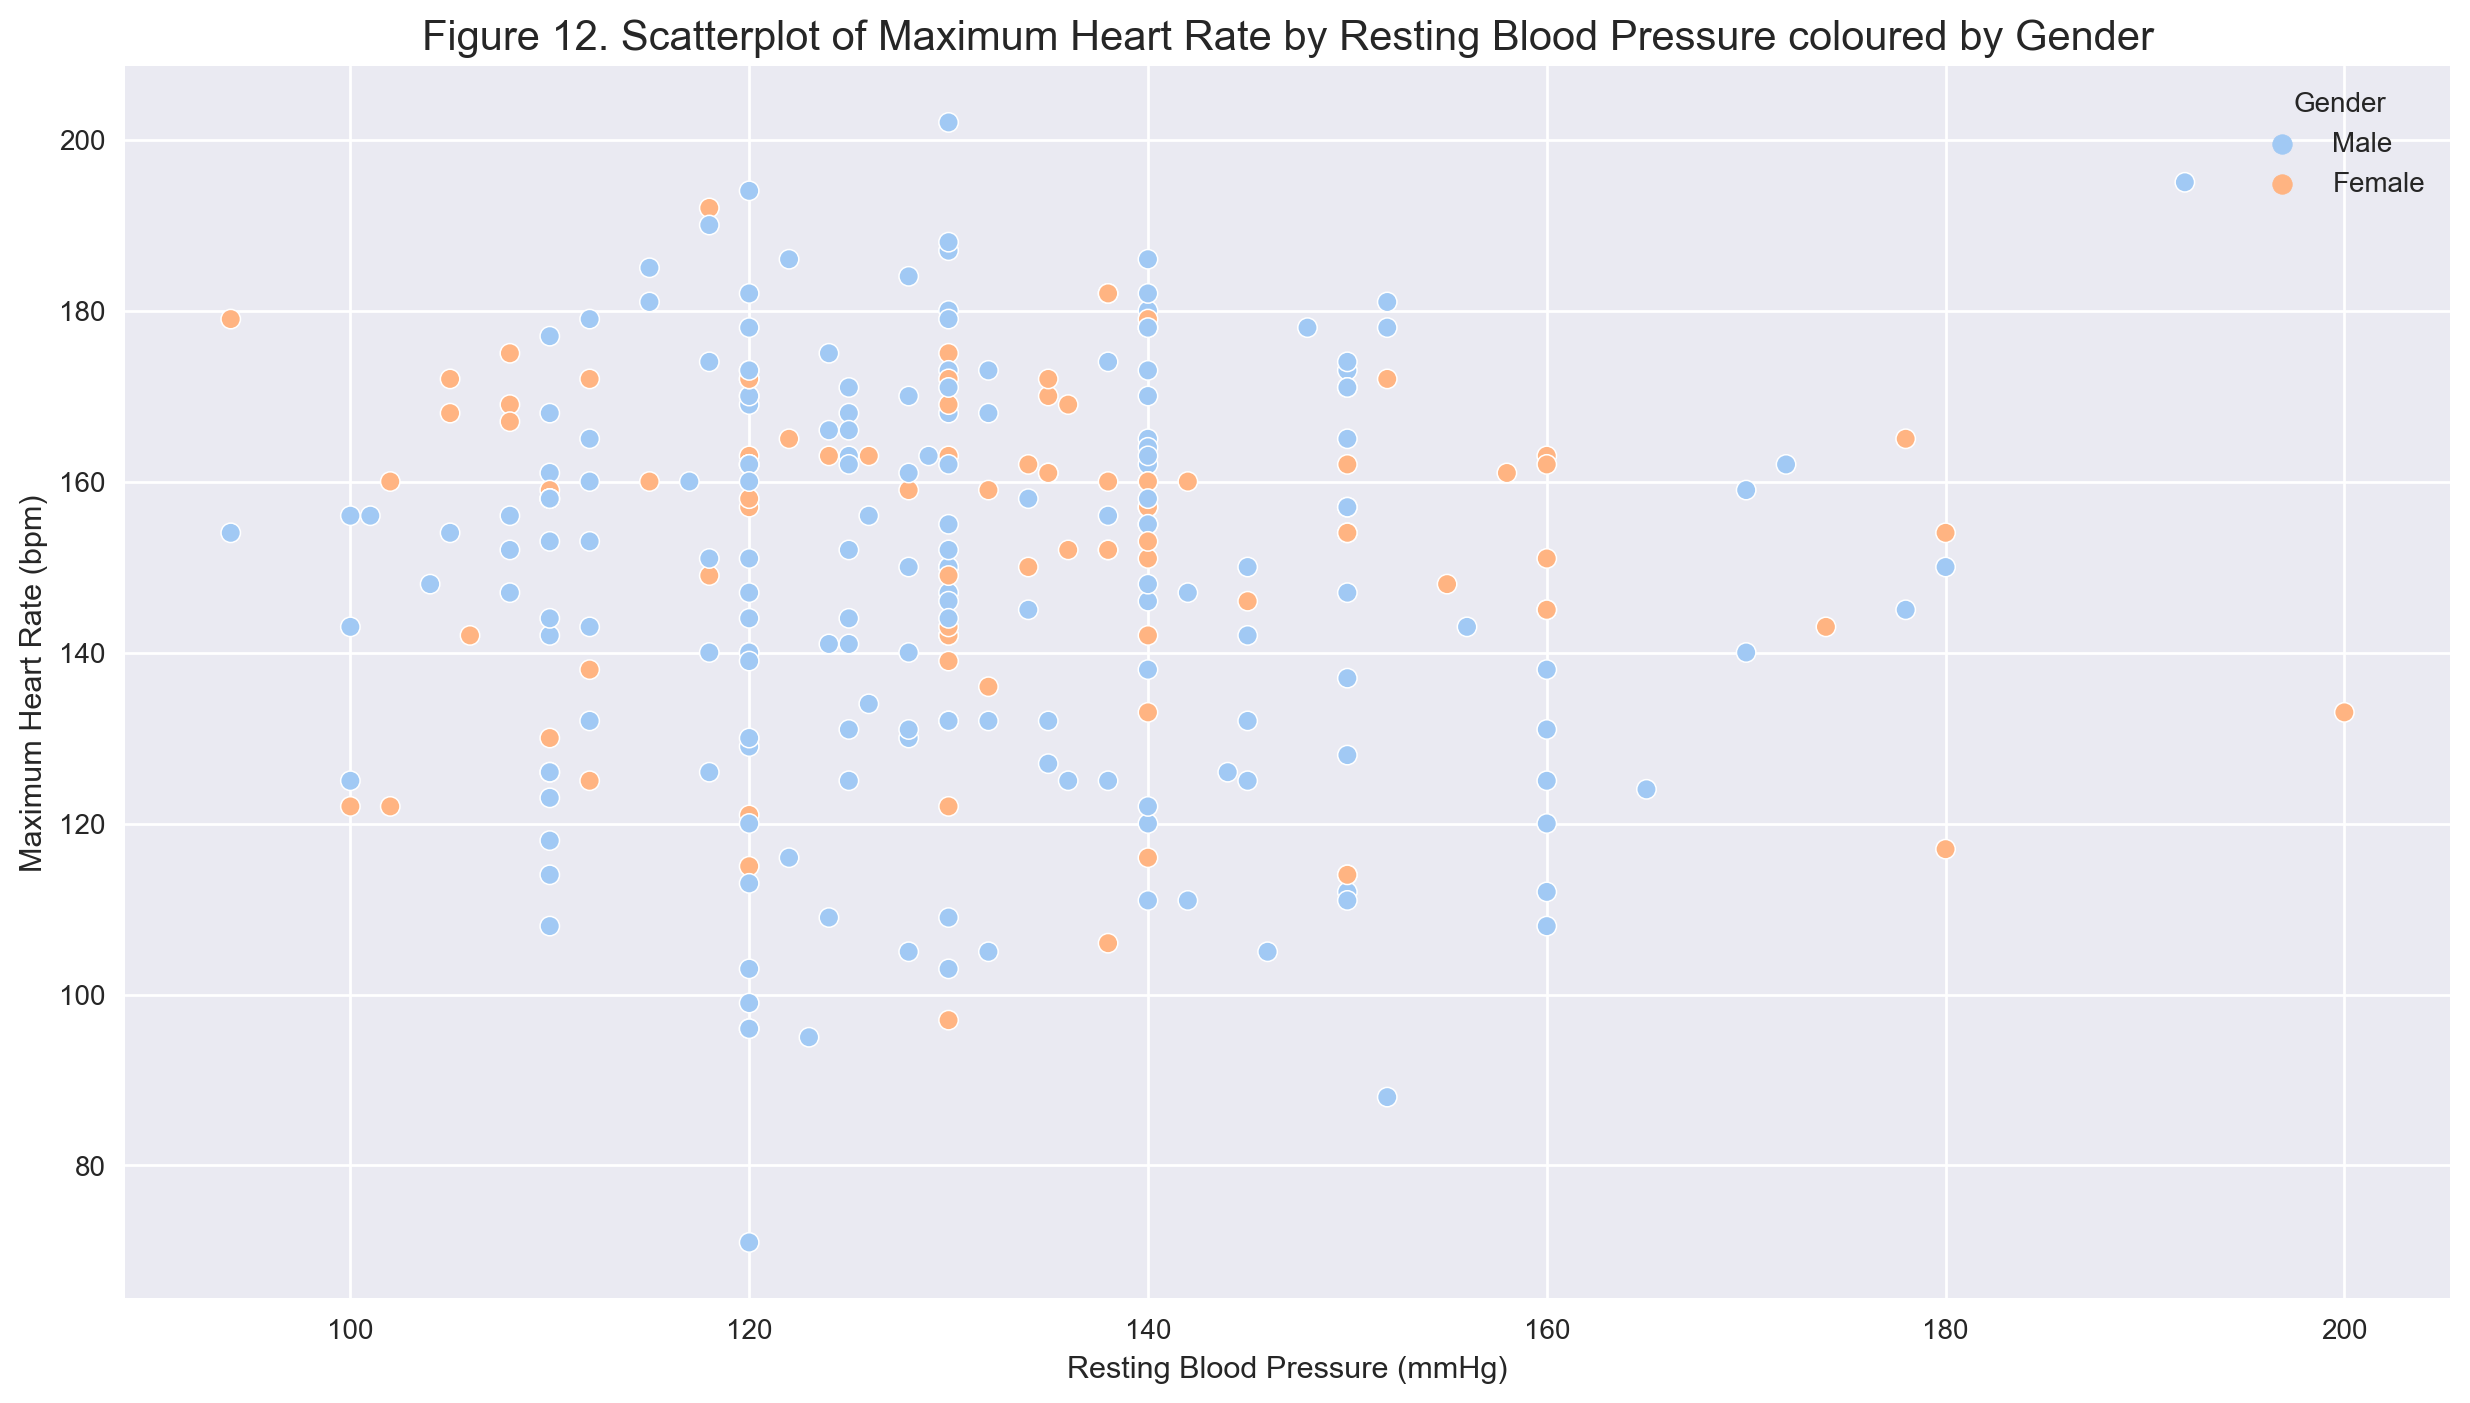

In [25]:
plt.figure(figsize = (15,8))
sns.scatterplot(df['RestBloodPressure'], df['MaxHeartRate'], hue = df['Sex'])
plt.title('Figure 12. Scatterplot of Maximum Heart Rate by Resting Blood Pressure coloured by Gender', fontsize = 15);
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.legend(title = 'Gender', loc = 'upper right')
plt.show();

#### Scatterplot of Maximum Heart Rate by Serum Cholestoral and ChestPainType

the scatterplot in Figure13. below shows a plot of maximum heart rate achieved by serum cholestoral with data points coloured by chest pain type.

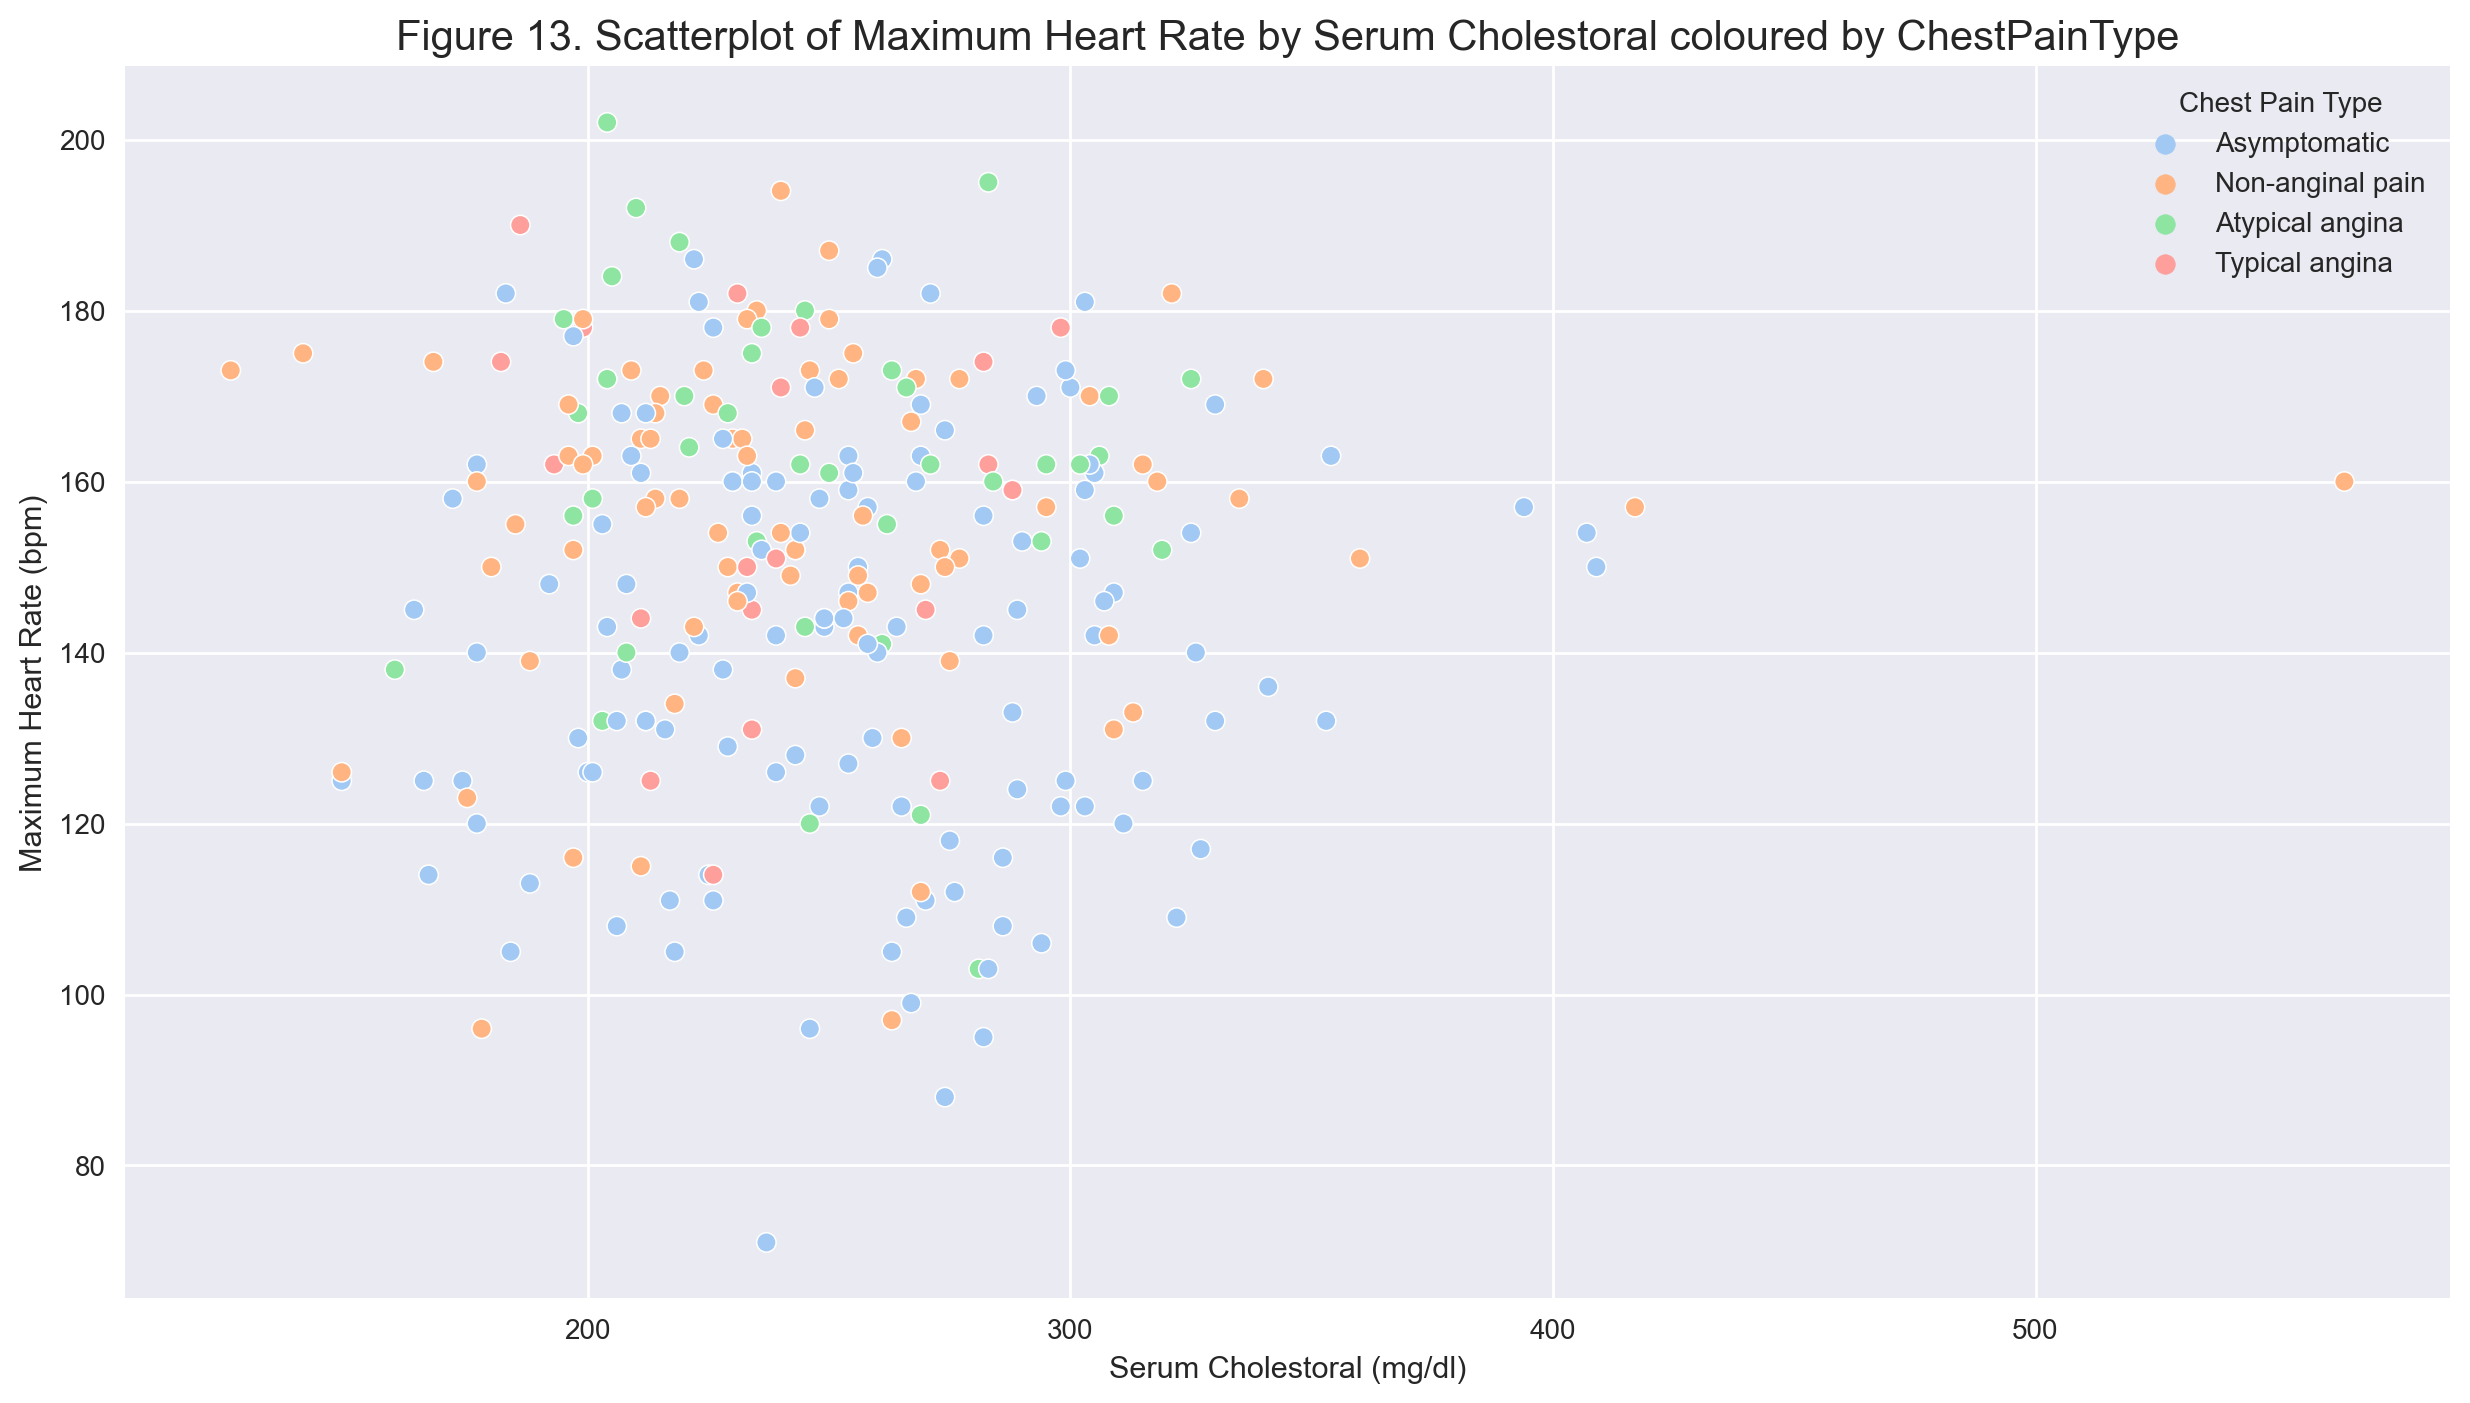

In [26]:
plt.figure(figsize = (15,8))
sns.scatterplot(df['SerumCholestoral'], df['MaxHeartRate'], hue = df['ChestPainType'])
plt.title('Figure 13. Scatterplot of Maximum Heart Rate by Serum Cholestoral coloured by ChestPainType', fontsize = 15);
plt.xlabel('Serum Cholestoral (mg/dl)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.legend(title = 'Chest Pain Type', loc = 'upper right')
plt.show();

### 5. Literature Review

Researchers have investigated the application of machine learning algorithms to predict the occurrence of heart disease, a serious health problem that affects millions of people globally. This section outlines the relevant studies on utilising machine learning for predicting heart disease.

A study by (Mohan et al., 2019), proposed a novel method to find significant features by applying machine learning techniques that resulted in improved accuracy for the prediction of cardiovascular disease. The study produced an enhanced performance level with an accuracy level of 88.7% through the hybrid random forest with a linear model (HRFLM).

Another study by (Gonsalves et al., 2019), used Machine Learning (ML) technology to predict CHD using historical medical data. They used three supervised learning techniques, Naïve Bayes (NB), Support Vector Machine (SVM) and Decision Tree (DT), to discover correlations in CHD data and derive intelligent models using 10-fold cross validation. Results showed that probabilistic models derived by NB are promising in detecting CHD.

A third study by (Spencer et al., 2020), experimentally assessed the performance of models derived by machine learning techniques by using relevant features chosen by various feature selection methods. Four commonly used heart disease datasets were evaluated using principal component analysis, Chi squared testing, ReliefF and symmetrical uncertainty. The researchers found the benefits of using feature selection vary depending on the machine learning technique used for the heart datasets they considerd. However, the best model they created used a combination of Chi-squared feature selection with the BayesNet algorithm and achieved an accuracy of 85.00% on the considered datasets.

In recent years, deep learning algorithms have been increasingly used for predicting heart disease. For example, the same dataset used in this project was used in another study by (Bharti et al., 2021) that used different machine learning algorithms and deep learning to compare the results and analysis of the UCI Machine Learning Heart Disease dataset. Results were achieved and validated using accuracy and confusion matrix. Using deep learning approach, the researchers were able to obtain 94.2% accuracy result.

In another study conducted by (Dwivedi, 2018), Six machine learning approaches such as Artificial Neural Network (ANN), Support Vector Machine (SVM), and k-nearest neighbor (kNN) were tested for their ability to predict heart disease. These algorithms' performance was evaluated using eight different classification performance metrics. Additionally, the receiver operating characteristic curve was used to evaluate these approaches. With a sensitivity and specificity of 89 and 81%, respectively, logistic regression was shown to have the greatest classification accuracy of 85%.

Numerous research have looked at the usage of data mining classification technique for parameter evaluation in addition to traditional evaluation methods. For instance, (J & Geetha, 2019) created a system that predicts the probability of getting heart disease. The results of this system give a percentage for the likelihood of getting heart disease. Medical parameters are used to classify the datasets. This system uses a data mining classification technique to analyse such parameters. The datasets are analysed using two key machine learning algorithms, Decision Tree Algorithm and Naive Bayes Algorithm, in Python programming, with Decision Tree Algorithm demonstrating the highest accuracy level for heart disease.

A machine learning-based diagnosis system for heart disease prediction was developed by (Haq et al., 2018) using seven well-known machine learning algorithms, three feature selection algorithms, the cross-validation method, and seven classifier performance evaluation metrics. The system can easily identify and classify people with heart disease from healthy people. Additionally, each classifier's receiver optimistic curves and area under the curves were calculated. The effectiveness of the suggested approach has been tested using both full features and a reduced set of features, with features reduction having an impact on classifiers performance in terms of accuracy and execution time.

The application of machine learning techniques in the medical sector continues to advance significantly. A unique machine learning strategy was suggested in a research by (Kavitha et al., 2021) to predict heart disease. The Cleveland heart disease dataset was used in the proposed study, and data mining methods including regression and classification were applied. Random Forest and Decision Tree machine learning algorithms were used. Three machine learning methods were employed in the implementation: Random Forest, Decision Tree, and Hybrid Model (Hybrid of random forest and decision tree). According to experimental findings, the hybrid model's heart disease prediction accuracy rate is 88.7%.

Recent efforts to predict mortality in patients with heart failure (HF) have been limited by statistical analytic approaches that fail to capture predictive information in big data sets with multidimensional interactions. In a research done by (Adler et al., 2020), correlations between patient characteristics and mortality were captured using a machine learning algorithm. In a cohort of 5822 hospitalised and ambulatory patients with HF, a model was created by training a boosted decision tree algorithm to link a subset of patient data with a very high or very low mortality risk. By identifying eight features (diastolic blood pressure, creatinine, blood urea nitrogen, haemoglobin, white blood cell count, platelets, albumin, and red blood cell distribution width), the researchers were able to create a risk score using this model that successfully distinguished between those who were at low and high risk of dying. This risk score was accurate over the whole risk spectrum, with an area under the curve (AUC) of 0.88. AUCs of 0.84 and 0.81 were obtained through external validation in two different HF groups, which were better than the results from the two available risk scores in these same populations.

The overall predictive ability of ML algorithms in heart disease has been the subject of several studies. For examle, (Krittanawong et al., 2020) aimed to evaluate and summarize the general prediction ability of machine learning algorithms in heart disease. The MEDLINE, Embase, and Scopus databases were examined extensively from database inception through March 15, 2019. The primary outcome was a composite of the prediction performance of ML algorithms for coronary artery disease, heart failure, stroke, and cardiac arrhythmias. Out of the 344 research found in total, 103 cohorts totalling 3,377,318 people matched the inclusion criteria. Boosting algorithms had a pooled area under the curve (AUC) for the prediction of coronary artery disease of 0.88 (95% CI 0.84-0.91), whereas custom-built algorithms had a pooled AUC of 0.93 (95% CI 0.85-0.97). Support vector machine (SVM) algorithms had a pooled AUC of 0.92 (95% CI 0.81-0.97), boosting methods had a pooled AUC of 0.91 (95% CI 0.81-0.96), and convolutional neural network (CNN) algorithms had a pooled AUC of 0.90 (95% CI 0.83-0.95) for stroke prediction. SVM may perform better than other algorithms in these situations, despite the fact that there are insufficient studies for each algorithm for the meta-analytic technique for both heart failure and cardiac arrhythmias since the confidence intervals overlap between many methods and demonstrate no difference. SVM and boosting algorithms in particular show promise for ML systems' abilities to detect cardiovascular illnesses. The ML algorithms do, however, differ in terms of a number of factors. Clinicians may find this information useful in figuring out the best algorithms to use for their dataset and in data interpretation.

Early methods of predicting heart disease aided in decision-making on the changes that should have taken place in high-risk individuals, which led to a reduction in their risks. Machine learning algorithms are required to produce excellent predictions of heart diseases. Combining these methods has been the focus of a recent study by (Dinesh et al., 2018) to create hybrid machine learning algorithms. This research suggests a prediction model to determine whether or not a person has heart disease and to inform or diagnose that. Through the use of methods like classification, accuracy, sensitivity, and specificity analysis, the performance of the diagnosis model is evaluated. This project suggests a prediction model to determine if a person has heart disease or not and to inform or diagnose that. To offer an accurate model of predicting cardiovascular illness, this is done by comparing the accuracies of applying rules to the individual results from Support Vector Machine, Gradient Boosting, Random forest, Naive Bayes classifier, and logistic regression on the dataset gathered in a region.

Better insights are being produced by the machine learning-based algorithms as they analyse the multidimensional health data. A recent study by (Princy et al., 2020), uses many cutting-edge Supervised Machine Learning algorithms that are specifically employed for disease prediction and were applied to classify a cardiovascular dataset. According to the researchers findings, Decision Tree classification model outperformed Naive Bayes, Logistic Regression, Random Forest, SVM, and KNN based methods in its ability to predict heart disease. The Decision Tree delivered the best outcome with a 73% accuracy rate.

A recent study by (Sarveshvar et al., 2021), compared the effectiveness of several machine learning techniques for the prediction of heart diseases. The dataset was standardised for better results and contains some irrelevant attributes that were deleted during the data cleaning step. This study examined the outcomes and analyses of the publicly available ML heart disease dataset using several ML techniques. A significant number of encouraging results were also validated using the accuracy and confusion matrices. When three machine learning algorithms are assessed against various performance measures, it is shown that Random Forest outperforms the others in terms of accuracy. However, it is also noted that the accuracy levels of the Logistic Regression and Naive Bayes classifiers were likewise extremely close to those of the Random Forest classifier.

Several studies have investigated the use of ensemble methods in addition to conventional machine learning techniques for the prediction of heart illness. For example, (Ashraf et al., 2021), used ensemble methods and individual learning algorithms to make predictions using BayesNet, J48, KNN, multilayer perceptron, Naïve Bayes, random tree, and random forest. J48 achieved a notable accuracy of 70.77% compared to other classifiers when the performance of these classifiers was evaluated. The same dataset was then used by the researchers to apply modern techniques such as TENSORFLOW, PYTORCH, and KERAS using data from Stanford's online repository. According to the empirical findings, KERAS outperformed the complete collection of machine learning algorithms that were examined with a remarkable prediction accuracy of 80%. Additionally, following performance analysis of both techniques  (conventional and cutting-edge technologies), a unique prediction model was proposed based on the performance improvisation in heart disease prediction accuracy. The main goal of this research study was to find appropriate ways that might improve the reliability and accuracy of the diagnostic performance of heart disease.

In conclusion, machine learning algorithms are being utilised more and more to predict heart disease more accurately. In recent studies, deep learning algorithms and ensemble approaches have yielded promising outcomes. Various ML methods were evaluated and contrasted using various datasets. To create machine learning algorithms that can forecast cardiac disease with greater accuracy and efficiency, additional research is required.

### 6. Summary and Conclusions

The primary goal of this project was to explore, clean, preprocess and visualize the Statlog (Heart) dataset. Data cleaning and preprocessing included dropping irrelevant features, checking data types, removing outliers, and handling missing values. Data exploration and visualisation processes were conducted to visualise data and identify relationships between each variable, with Univariate visualisations, two-variable visualisations, and three-variable visualisations being used.

Overall, the data cleaning and preparation helped us better understand the dataset and prepare it for further analysis and modelling.

### 7. References

- Mohan, S., Thirumalai, C., & Srivastava, G. (2019). Effective Heart Disease Prediction Using Hybrid Machine Learning Techniques. IEEE Access. https://doi.org/10.1109/access.2019.2923707

- Gonsalves, A. H., Thabtah, F., Mohammad, R. M. A., & Singh, G. (2019). Prediction of Coronary Heart Disease using Machine Learning. Proceedings of the 2019 3rd International Conference on Deep Learning Technologies. https://doi.org/10.1145/3342999.3343015


- Spencer, R., Thabtah, F., Abdelhamid, N., & Thompson, M. (2020). Exploring feature selection and classification methods for predicting heart disease. Digital Health, 6, 205520762091477. https://doi.org/10.1177/2055207620914777


- Bharti, R., Khamparia, A., Shabaz, M., Dhiman, G., Pande, S., & Singh, P. (2021). Prediction of Heart Disease Using a Combination of Machine Learning and Deep Learning. Computational Intelligence and Neuroscience, 2021, 1–11. https://doi.org/10.1155/2021/8387680


- Dwivedi, A. K. (2018). Performance evaluation of different machine learning techniques for prediction of heart disease. Neural Computing and Applications, 29(10), 685–693. https://doi.org/10.1007/s00521-016-2604-1


- J, S. K., & Geetha, S. (2019). Prediction of Heart Disease Using Machine Learning Algorithms. 2019 1st International Conference on Innovations in Information and Communication Technology (ICIICT). https://doi.org/10.1109/iciict1.2019.8741465


- Haq, A. U., Li, J., Memon, M. H., Nazir, S., & Sun, R. (2018). A Hybrid Intelligent System Framework for the Prediction of Heart Disease Using Machine Learning Algorithms. Mobile Information Systems, 2018, 1–21. https://doi.org/10.1155/2018/3860146


- Kavitha, M., Gnaneswar, G., Dinesh, R., Sai, Y. R., & Suraj, R. S. (2021). Heart Disease Prediction using Hybrid machine Learning Model. International Conference on Inventive Computation Technologies. https://doi.org/10.1109/icict50816.2021.9358597


- Adler, E., Voors, A. A., Klein, L., Macheret, F., Braun, O. Ö., Urey, M. A., Zhu, W., Sama, I. E., Tadel, M., Campagnari, C., Greenberg, B. H., & Yagil, A. (2020). Improving risk prediction in heart failure using machine learning. European Journal of Heart Failure, 22(1), 139–147. https://doi.org/10.1002/ejhf.1628


- Krittanawong, C., Virk, H. U. H., Bangalore, S., Wang, Z., Johnson, K. W., Pinotti, R., Zhang, H., Kaplin, S., Narasimhan, B., Kitai, T., Baber, U., Halperin, J. L., & Tang, W. K. (2020). Machine learning prediction in cardiovascular diseases: a meta-analysis. Scientific Reports, 10(1). https://doi.org/10.1038/s41598-020-72685-1


- Dinesh, K. P., Arumugaraj, K., Santhosh, K., & Mareeswari, V. (2018). Prediction of Cardiovascular Disease Using Machine Learning Algorithms. 2018 International Conference on Current Trends Towards Converging Technologies (ICCTCT). https://doi.org/10.1109/icctct.2018.8550857


- Princy, R. J. P., Parthasarathy, S., Jose, P. S. H., Lakshminarayanan, A. R., & Jeganathan, S. (2020). Prediction of Cardiac Disease using Supervised Machine Learning Algorithms. International Conference Intelligent Computing and Control Systems. https://doi.org/10.1109/iciccs48265.2020.9121169


- Sarveshvar, M. R., Gogoi, A., Chaubey, A. K., S, R., & Mahesh, T. R. (2021). Performance of different Machine Learning Techniques for the Prediction of Heart Diseases. 2021 International Conference on Forensics, Analytics, Big Data, Security (FABS). https://doi.org/10.1109/fabs52071.2021.9702566


- Ashraf, M., Ahmad, S. A., Ganai, N. A., Shah, R. A., Zaman, M., Khan, S. U. D., & Shah, A. A. (2021). Prediction of Cardiovascular Disease Through Cutting-Edge Deep Learning Technologies: An Empirical Study Based on TENSORFLOW, PYTORCH and KERAS. Advances in Intelligent Systems and Computing, 239–255. https://doi.org/10.1007/978-981-15-5113-0_18